In [80]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Group 16 - Business Intelligence - Assignment 3

## Data Understanding: Data Description Report presenting

In [81]:
import os

#directory_path = '/content/drive/MyDrive/data/'
directory_path = "./data/"
dfs = []

for filename in os.listdir(directory_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory_path, filename)
        df = pd.read_csv(file_path)
        if filename == "listings dec21.csv":
          df["season"] = "winter"
          print(f"Winter dataset has {df.shape} shape")
        if filename == "listings jun21.csv":
          df["season"] = "summer"
          print(f"Summer dataset has {df.shape} shape")
        if filename == "listings mar21.csv":
          df["season"] = "spring"
          print(f"Spring dataset has {df.shape} shape")
        if filename == "listings sep21.csv":
          df["season"] = "autumn"
          print(f"Autumn dataset has {df.shape} shape")

        dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)

#grouped_df = combined_df.groupby('id').agg('mean')

combined_df.head()

Winter dataset has (18526, 75) shape
Summer dataset has (19281, 75) shape
Spring dataset has (19804, 75) shape
Autumn dataset has (19105, 75) shape


id                         listing_url       scrape_id last_scraped  \
0   6499   https://www.airbnb.com/rooms/6499  20211208225323   2021-12-10   
1  25659  https://www.airbnb.com/rooms/25659  20211208225323   2021-12-09   
2  29248  https://www.airbnb.com/rooms/29248  20211208225323   2021-12-09   
3  29396  https://www.airbnb.com/rooms/29396  20211208225323   2021-12-09   
4  29720  https://www.airbnb.com/rooms/29720  20211208225323   2021-12-09   

                                               name  \
0              Belém 1 Bedroom Historical Apartment   
1  Heart of Alfama Lisbon Center - Cœur de l'Alfama   
2          Apartamento Alfama com vista para o rio!   
3                  Alfama Hill - Boutique apartment   
4                       TheHOUSE - Your luxury home   

                                         description  \
0  This apartment is all about Location, next to ...   
1  *** 100% Covid 19 cleaning protocols <br />NON...   
2  <b>The space</b><br />Located in the city cent...   
3  Feel at home in the historic centre of Lisbon....   
4  A house at the top of an anonimous building, T...   

                               neighborhood_overview  \
0  To get  to the city center, tram 15 stops in f...   
1  Alfama is the oldest and most picturesque quar...   
2                                                NaN   
3  Great neighborhood in the old part of town. Am...   
4  Location in the city's Embassies area, near en...   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/6422ee92-c84e...    14455   
1  https://a0.muscache.com/pictures/a4c86b5f-ceaf...   107347   
2  https://a0.muscache.com/pictures/4212cc65-2046...   125768   
3  https://a0.muscache.com/pictures/163913/7d622c...   126415   
4  https://a0.muscache.com/pictures/7c977dcc-57d0...   128075   

                                   host_url  ... review_scores_location  \
0   https://www.airbnb.com/users/show/14455  ...                   4.81   
1  https://www.airbnb.com/users/show/107347  ...                   4.88   
2  https://www.airbnb.com/users/show/125768  ...                   4.82   
3  https://www.airbnb.com/users/show/126415  ...                   4.88   
4  https://www.airbnb.com/users/show/128075  ...                   4.83   

  review_scores_value    license instant_bookable  \
0                4.52        NaN                t   
1                4.82  56539/AL.                t   
2                4.61   23535/AL                t   
3                4.75   28737/AL                t   
4                4.60   55695/AL                f   

  calculated_host_listings_count calculated_host_listings_count_entire_homes  \
0                              1                                           1   
1                              1                                           1   
2                              1                                           1   
3                              1                                           1   
4                              2                                           2   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month  season  
0                                           0              0.36  winter  
1                                           0              1.37  winter  
2                                           0              2.53  winter  
3                                           0              2.57  winter  
4                                           0              0.48  winter  

[5 rows x 75 columns]

In [82]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76716 entries, 0 to 76715
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            76716 non-null  int64  
 1   listing_url                                   76716 non-null  object 
 2   scrape_id                                     76716 non-null  int64  
 3   last_scraped                                  76716 non-null  object 
 4   name                                          76679 non-null  object 
 5   description                                   76640 non-null  object 
 6   neighborhood_overview                         50239 non-null  object 
 7   picture_url                                   76716 non-null  object 
 8   host_id                                       76716 non-null  int64  
 9   host_url                                      76716 non-null 

Convert Obj column to Decimal

In [83]:
combined_df.price

0         $40.00
1         $50.00
2         $60.00
3         $60.00
4        $957.00
          ...   
76711     $40.00
76712     $31.00
76713    $200.00
76714     $80.00
76715     $70.00
Name: price, Length: 76716, dtype: object

Preprocess from string to numeric

In [84]:
# Step 1: Remove the '%' symbol and convert to float
combined_df['host_acceptance_rate'] = combined_df['host_acceptance_rate'].str.rstrip('%').astype(float)
# Step 2: Divide by 100 to scale to the range of 0 to 1
combined_df['host_acceptance_rate'] = combined_df['host_acceptance_rate'] / 100

combined_df['price'] = combined_df['price'].str.replace('$', '').str.replace(',', '').astype(float)



<ipython-input-84-9df36e91cc56>:6: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [85]:
value_counts_series = combined_df['id'].value_counts()
filtered_values = value_counts_series[value_counts_series < 4].index
filtered_count = len(filtered_values)

filtered_values_2seasons = value_counts_series[value_counts_series < 3].index
filtered_count_2 = len(filtered_values_2seasons)

In [86]:
print(f"From {combined_df.id.nunique()} unique Airbnb offerings, we have {filtered_count} offerings missing information for all 4 seasons and {filtered_count_2} offernings for 2 seasons or less")

From 23662 unique Airbnb offerings, we have 8702 offerings missing information for all 4 seasons and 6005 offernings for 2 seasons or less


In [87]:
columns_to_drop = ['id', 'scrape_id', "host_id", "host_listings_count", "host_total_listings_count", "latitude", "longitude", "calendar_updated", "number_of_reviews_ltm", "number_of_reviews_l30d", "bathrooms"]
df_droped = combined_df.drop(columns=columns_to_drop)

<ipython-input-88-f4614192a4ed>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



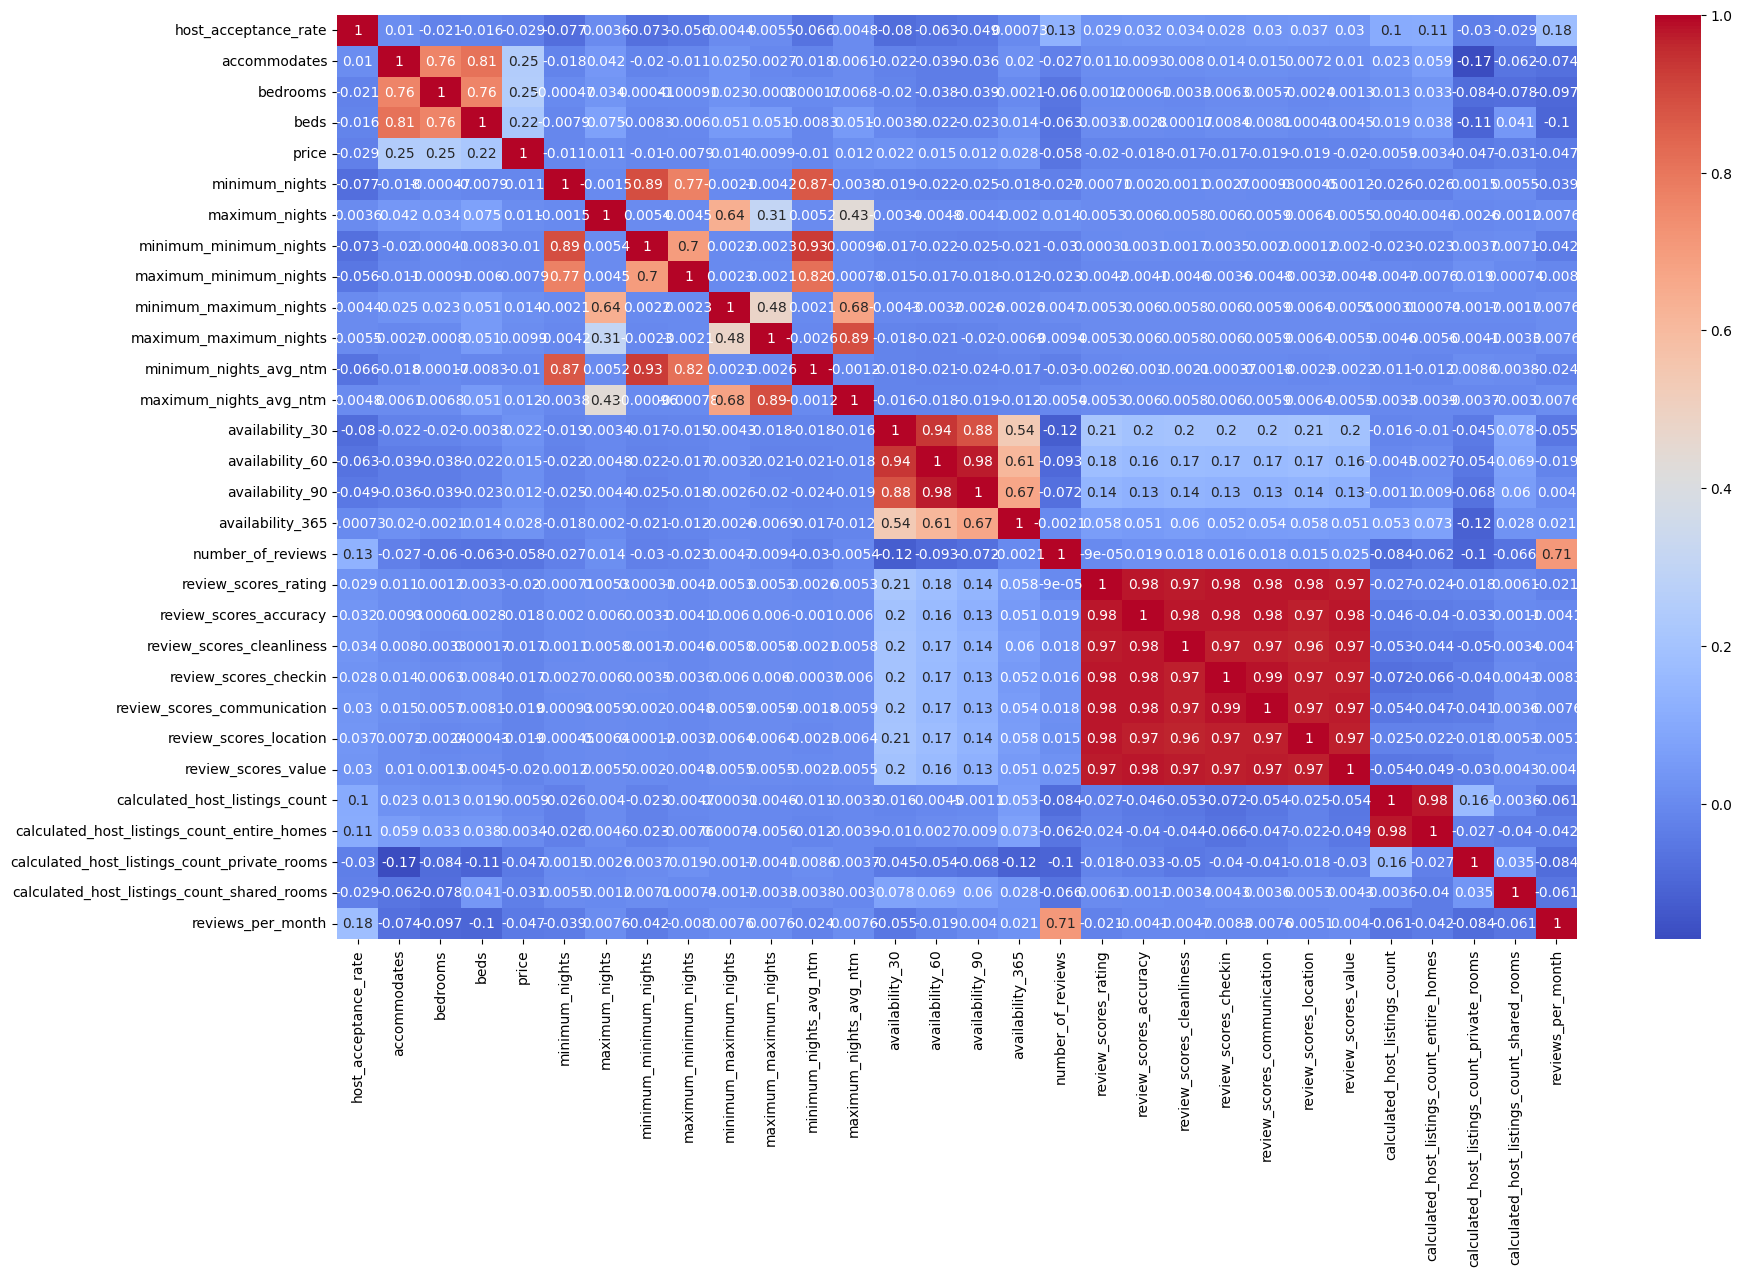

In [88]:
plt.figure(figsize=(20,12))
sns.heatmap(df_droped.corr(), annot=True, cmap='coolwarm')
plt.show()

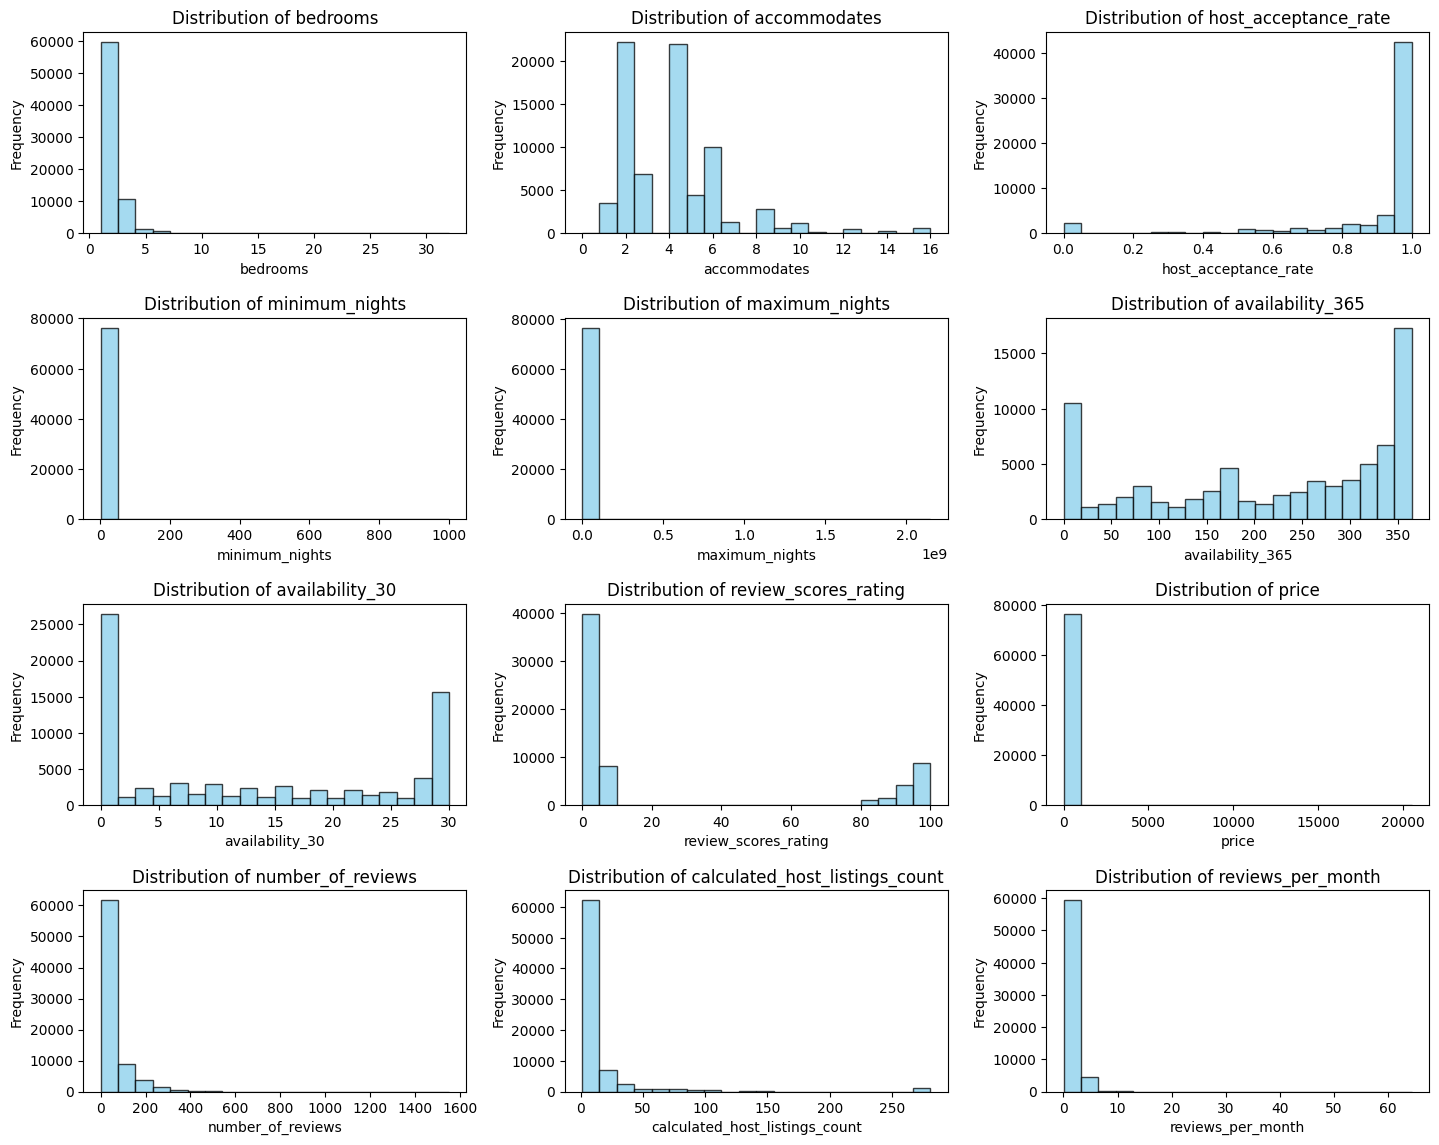

In [89]:
# List of variables to explore
distributions_to_explore = ["bedrooms", "accommodates", "host_acceptance_rate", "minimum_nights", "maximum_nights", "availability_365", "availability_30", "review_scores_rating", "price", "number_of_reviews", "calculated_host_listings_count", "reviews_per_month"]

# Determine the number of rows and columns for subplots
num_rows = 4  # You can adjust the number of rows and columns as needed
num_cols = 3
total_subplots = num_rows * num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))
fig.tight_layout(pad=4.0)  # Adjust the spacing between subplots

# Loop through variables and create histograms
for i, var in enumerate(distributions_to_explore):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    ax.hist(combined_df[var], bins=20, alpha=0.75, color='skyblue', edgecolor='black')
    ax.set_xlabel(var)
    ax.set_ylabel("Frequency")
    ax.set_title(f"Distribution of {var}")

# Hide any empty subplots
for i in range(len(distributions_to_explore), total_subplots):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.show()

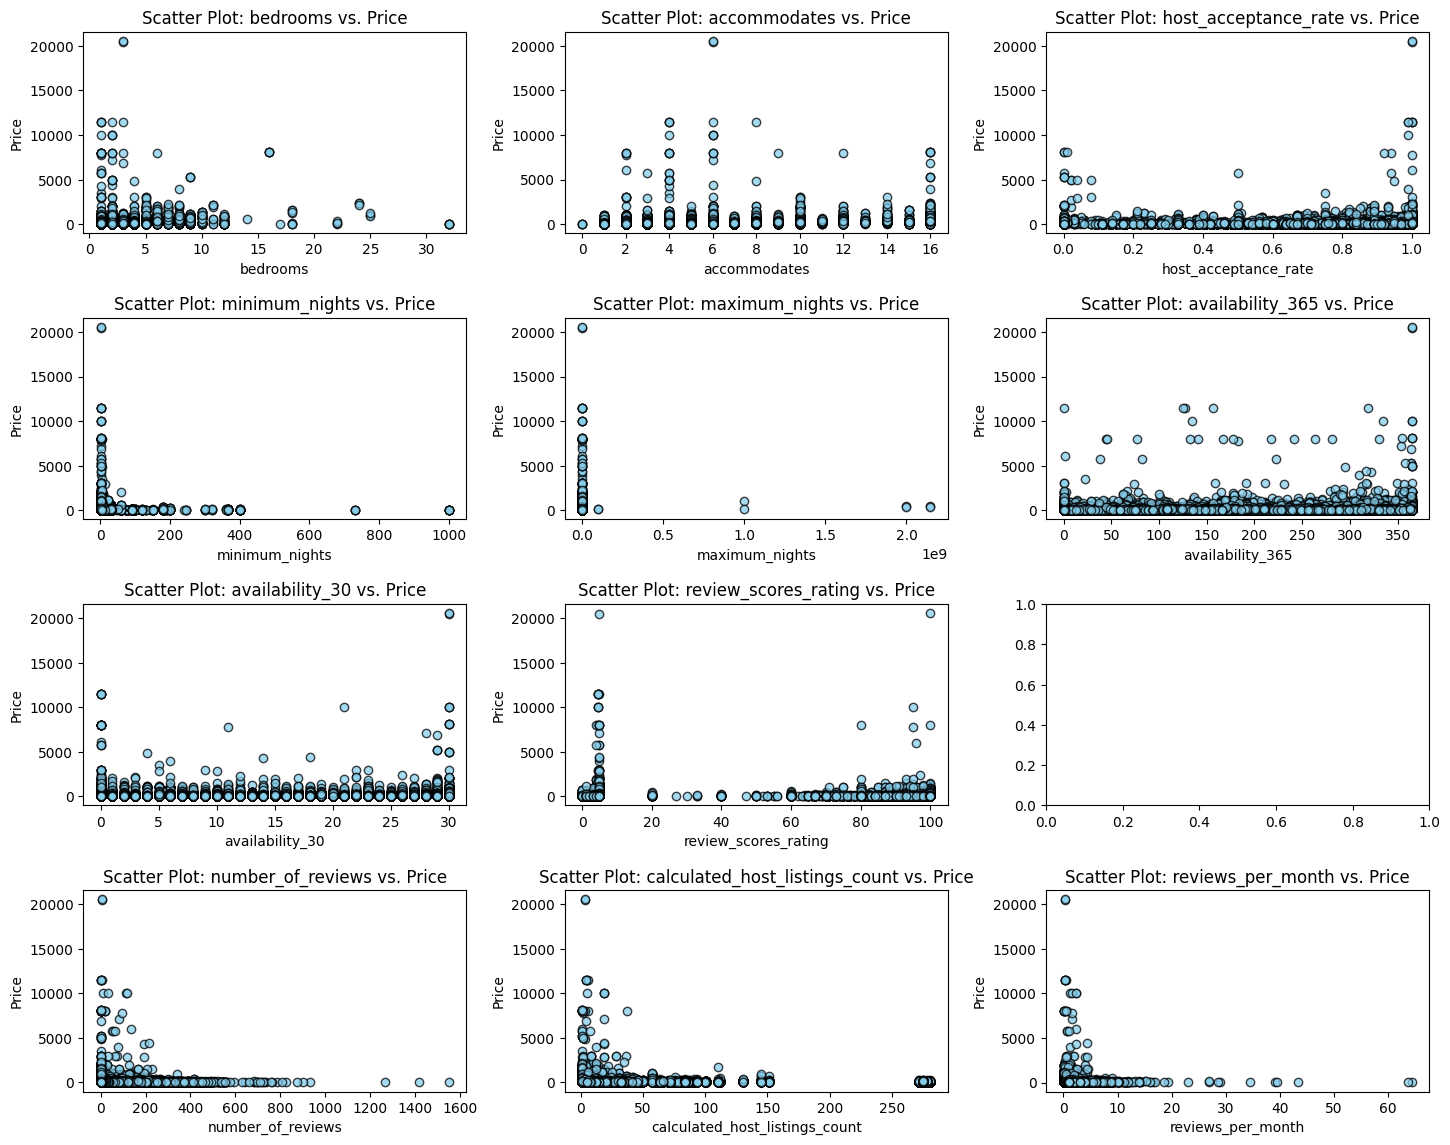

In [90]:
num_rows = 4  # You can adjust the number of rows and columns as needed
num_cols = 3
total_subplots = num_rows * num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))
fig.tight_layout(pad=4.0)  # Adjust the spacing between subplots

# Loop through variables and create scatter plots
for i, var in enumerate(distributions_to_explore):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    if var != "price":
        ax.scatter(combined_df[var], combined_df["price"], alpha=0.75, color='skyblue', edgecolor='black')
        ax.set_xlabel(var)
        ax.set_ylabel("Price")
        ax.set_title(f"Scatter Plot: {var} vs. Price")

# Hide any empty subplots
for i in range(len(distributions_to_explore), total_subplots):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.show()

In [91]:
temp = combined_df[(combined_df['reviews_per_month'] < 15) & (combined_df['price'] < 7500)]

In [92]:
cat_vars = ["host_response_time", "room_type", "instant_bookable", "season"]

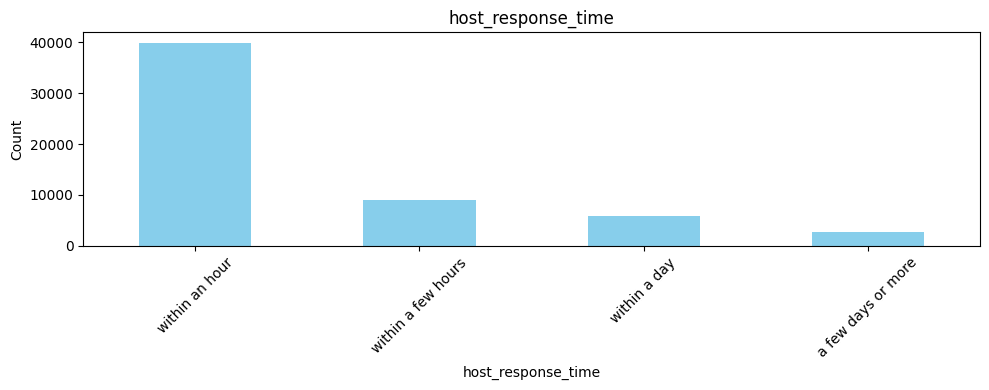

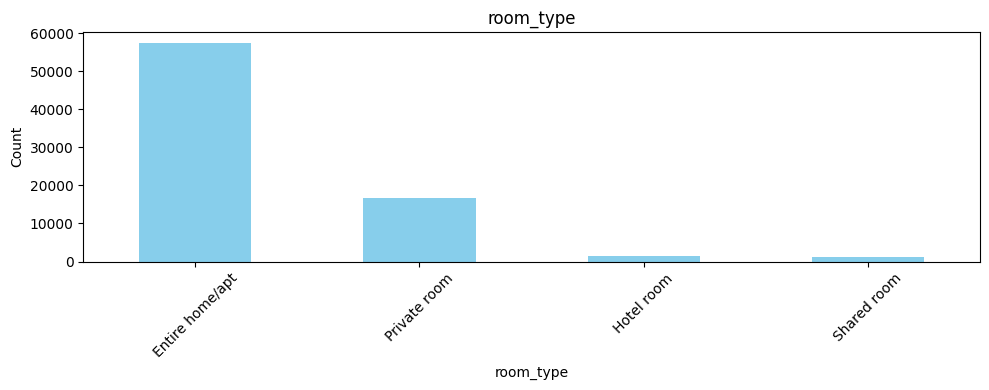

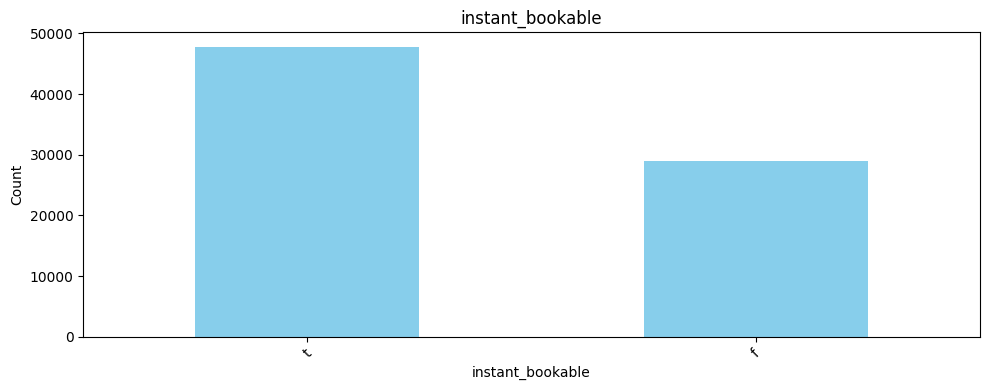

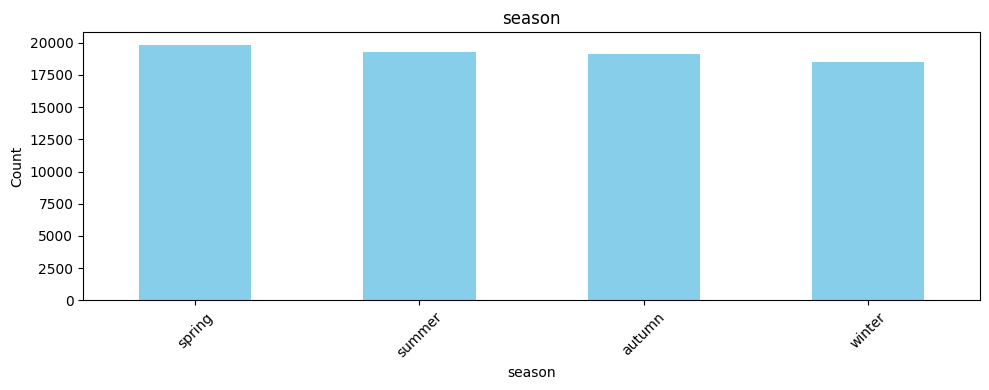

In [93]:
for i in cat_vars:
    plt.figure(figsize=(10, 4))  # Adjust figure size as needed
    plt.title(i)
    combined_df[i].value_counts().plot(kind='bar', color='skyblue')
    plt.xlabel(i)
    plt.ylabel("Count")
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.tight_layout()
    plt.show()

In [94]:
combined_df.neighbourhood.value_counts().head(8)

Lisboa, Portugal              31121
Lisbon, Portugal               3575
Cascais, Lisboa, Portugal      1820
Ericeira, Lisboa, Portugal     1499
Sintra, Lisboa, Portugal       1302
Estoril, Lisboa, Portugal       925
Colares, Lisboa, Portugal       689
Lisbon, Lisboa, Portugal        475
Name: neighbourhood, dtype: int64

In [95]:
combined_df.neighbourhood_cleansed.value_counts().head(8)

Santa Maria Maior    12384
Misericrdia           9242
Arroios               6761
Cascais e Estoril     5085
So Vicente            4442
Santo Antnio          4427
Estrela               3058
Ericeira              2776
Name: neighbourhood_cleansed, dtype: int64

In [96]:
combined_df.neighbourhood_group_cleansed.value_counts().head(8)

Lisboa           54017
Cascais           7206
Sintra            4946
Mafra             4675
Lourinh           1520
Oeiras            1180
Torres Vedras      990
Loures             543
Name: neighbourhood_group_cleansed, dtype: int64

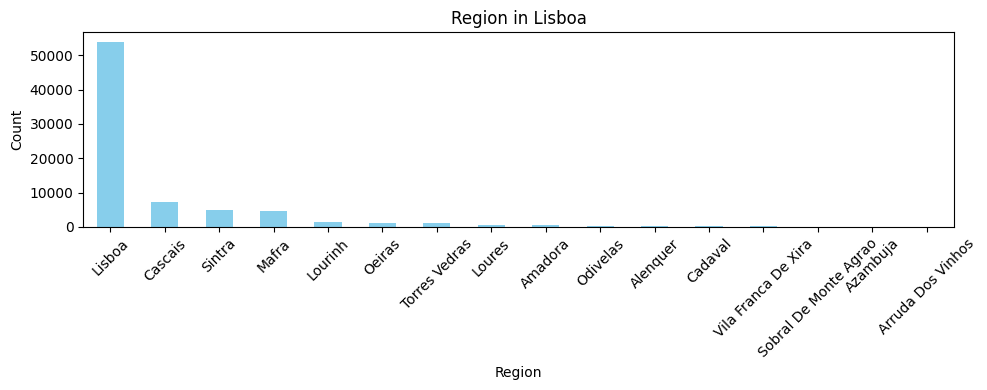

In [97]:
plt.figure(figsize=(10, 4))  # Adjust figure size as needed
plt.title("Region in Lisboa")
combined_df.neighbourhood_group_cleansed.value_counts().plot(kind='bar', color='skyblue')
plt.xlabel("Region")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

In [98]:
random_values = combined_df['id'].sample(n=10, random_state=42)

for i in random_values:
  print(combined_df[combined_df.id == i][["season", "id", "price", "availability_365"]])
  print("-------------------------------------------------------------")

       season       id  price  availability_365
1442   winter  3826726   65.0               331
20075  summer  3826726   85.0               356
39432  spring  3826726   75.0               330
59115  autumn  3826726   80.0               351
-------------------------------------------------------------
       season       id  price  availability_365
2426   winter  7048266   75.0               364
21141  summer  7048266   75.0               364
40551  spring  7048266   77.0               365
60131  autumn  7048266   77.0               364
-------------------------------------------------------------
       season      id  price  availability_365
127    winter  306191   59.0               301
18666  summer  306191   61.0               327
37952  spring  306191   45.0               353
57749  autumn  306191   65.0               336
-------------------------------------------------------------
       season        id  price  availability_365
13126  winter  37016110   35.0                 0
3

In [99]:
import plotly.express as px
px.density_mapbox (combined_df, lat = "latitude", lon = "longitude", z = "price", radius = 15, center = {"lat": combined_df.latitude.mean (), "lon": combined_df.longitude.mean ()}, zoom =10, mapbox_style = "open-street-map").show ()

## Data Preprocessing


### Variable selection

In [100]:
updated_df=combined_df.drop(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url','host_response_time',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_acceptance_rate','bathrooms','host_response_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'latitude',
       'longitude','first_review','last_review',
       'bathrooms_text', 'amenities','calendar_updated',
       'calendar_last_scraped', 'license', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms','has_availability'], axis=1)

In [101]:
combined_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [102]:
updated_df.head(2)

neighbourhood_group_cleansed       property_type        room_type  \
0                       Lisboa  Entire rental unit  Entire home/apt   
1                       Lisboa  Entire rental unit  Entire home/apt   

   accommodates  bedrooms  beds  price  minimum_nights  maximum_nights  \
0             4       1.0   1.0   40.0               3             365   
1             3       1.0   1.0   50.0               2              14   

   minimum_minimum_nights  ...  number_of_reviews_l30d  review_scores_rating  \
0                       3  ...                       0                  4.50   
1                       2  ...                       2                  4.81   

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0                    4.39                       4.38                   4.81   
1                    4.89                       4.88                   4.97   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         4.97                    4.81                 4.52   
1                         4.97                    4.88                 4.82   

   reviews_per_month  season  
0               0.36  winter  
1               1.37  winter  

[2 rows x 31 columns]

In [103]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76716 entries, 0 to 76715
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   neighbourhood_group_cleansed  76716 non-null  object 
 1   property_type                 76716 non-null  object 
 2   room_type                     76716 non-null  object 
 3   accommodates                  76716 non-null  int64  
 4   bedrooms                      72744 non-null  float64
 5   beds                          75530 non-null  float64
 6   price                         76716 non-null  float64
 7   minimum_nights                76716 non-null  int64  
 8   maximum_nights                76716 non-null  int64  
 9   minimum_minimum_nights        76716 non-null  int64  
 10  maximum_minimum_nights        76716 non-null  int64  
 11  minimum_maximum_nights        76716 non-null  int64  
 12  maximum_maximum_nights        76716 non-null  int64  
 13  m

### External data source




In [104]:
file_path = '/content/drive/MyDrive/data/Destaque_RENDAS_2023_2T_EN.xlsx'

sheet_name = 'Last 12 months'
df = pd.read_excel(file_path, sheet_name=sheet_name)
df.head(2)

Contents   Unnamed: 1                                         Unnamed: 2  \
0      COD  Designation  1st quartile value of house rental per m2 of n...   
1      NaN          NaN                                          1stS 2023   

  Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1  2ndS 2022  1stS 2022  2ndS 2021  1stS 2021  2ndS 2020  1stS 2020   

   Unnamed: 9  ... Unnamed: 15 Unnamed: 16 Unnamed: 17  \
0         NaN  ...         NaN         NaN         NaN   
1         NaN  ...   2ndS 2020   1stS 2020         NaN   

                                         Unnamed: 18 Unnamed: 19 Unnamed: 20  \
0  3rd quartile value of house rental per m2 of n...         NaN         NaN   
1                                          1stS 2023   2ndS 2022   1stS 2022   

  Unnamed: 21  Unnamed: 22 Unnamed: 23 Unnamed: 24  
0         NaN          NaN         NaN         NaN  
1   2ndS 2021    1stS 2021   2ndS 2020   1stS 2020  

[2 rows x 25 columns]

In [105]:
Ext_df=df[["Unnamed: 1","Unnamed: 13"]]

In [106]:
Ext_df = Ext_df.rename(columns={"Unnamed: 1": "Region", "Unnamed: 13": "Value"})
Ext_df = Ext_df.drop(Ext_df.index[:2])
Ext_df.head(2)

Region Value
2    Portugal  6.04
3  Continente  6.08

In [107]:
regions_to_check = [x.upper() for x in combined_df['neighbourhood_group_cleansed'].unique()]

In [108]:
Ext_df['Region_Upper'] = Ext_df['Region'].str.upper()

exists = Ext_df['Region_Upper'].isin(regions_to_check)


In [109]:
Ext_df_filtered = Ext_df[exists]

In [110]:
Ext_df_filtered = Ext_df_filtered.drop('Region_Upper', axis=1)

In [111]:
contains_condition = Ext_df['Region_Upper'].str.contains('LOURINH', na=False) | Ext_df['Region_Upper'].str.contains('SOBRAL DE MONTE', na=False)

filtered_data = Ext_df[contains_condition][['Region', 'Value']]
Ext_df_filtered = Ext_df_filtered.append(filtered_data, ignore_index=True)

<ipython-input-111-8ab0161fe417>:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [112]:
Ext_df_filtered['Region'] = Ext_df_filtered['Region'].replace({'Lourinhã': 'Lourinh', 'Sobral de Monte Agraço': 'Sobral De Monte Agrao'})
Ext_df_filtered

Region  Value
0                Alenquer    5.3
1       Arruda dos Vinhos   5.38
2                 Cadaval   3.62
3           Torres Vedras   5.68
4                 Amadora   8.85
5                 Cascais  10.95
6                  Lisboa  11.24
7                  Loures    7.9
8                   Mafra   6.94
9                Odivelas   8.43
10                 Oeiras     10
11                 Sintra   7.46
12    Vila Franca de Xira   7.09
13               Azambuja   5.01
14                Lourinh   4.45
15  Sobral De Monte Agrao   4.71

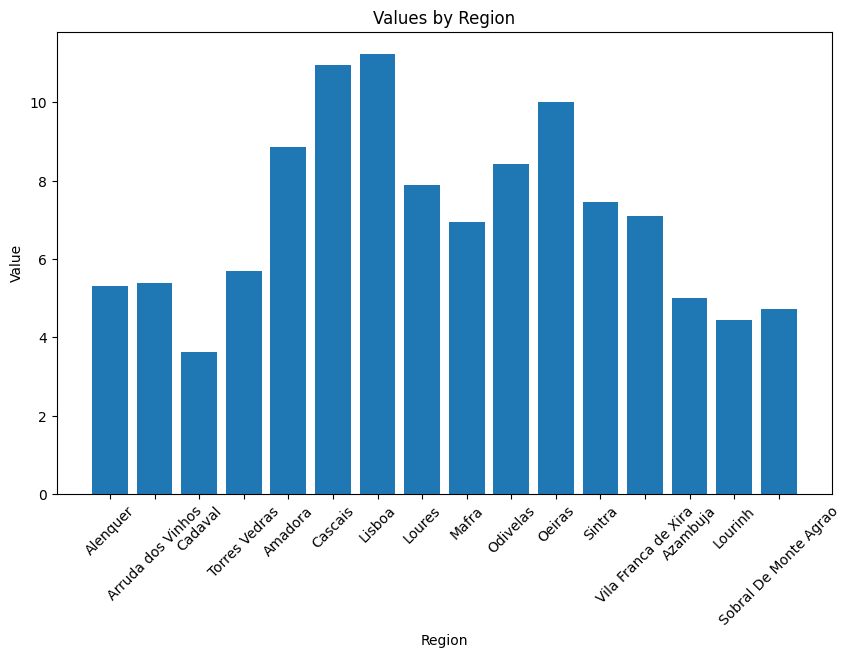

In [113]:
plt.figure(figsize=(10, 6))
plt.bar(Ext_df_filtered['Region'], Ext_df_filtered['Value'])
plt.title('Values by Region')
plt.xlabel('Region')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='center')
plt.show()

In [114]:
region_to_value_map = Ext_df_filtered.set_index('Region')['Value'].to_dict()
updated_df['Value'] = updated_df['neighbourhood_group_cleansed'].map(region_to_value_map)

updated_df.head(2)

neighbourhood_group_cleansed       property_type        room_type  \
0                       Lisboa  Entire rental unit  Entire home/apt   
1                       Lisboa  Entire rental unit  Entire home/apt   

   accommodates  bedrooms  beds  price  minimum_nights  maximum_nights  \
0             4       1.0   1.0   40.0               3             365   
1             3       1.0   1.0   50.0               2              14   

   minimum_minimum_nights  ...  review_scores_rating  review_scores_accuracy  \
0                       3  ...                  4.50                    4.39   
1                       2  ...                  4.81                    4.89   

   review_scores_cleanliness  review_scores_checkin  \
0                       4.38                   4.81   
1                       4.88                   4.97   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         4.97                    4.81                 4.52   
1                         4.97                    4.88                 4.82   

   reviews_per_month  season  Value  
0               0.36  winter  11.24  
1               1.37  winter  11.24  

[2 rows x 32 columns]

### Encoding the categorical variables

In [115]:
categorical_columns = ['property_type', 'room_type', 'season', 'neighbourhood_group_cleansed']

In [116]:
updated_df = pd.get_dummies(updated_df, columns=categorical_columns)

In [117]:
updated_df.head(2)

accommodates  bedrooms  beds  price  minimum_nights  maximum_nights  \
0             4       1.0   1.0   40.0               3             365   
1             3       1.0   1.0   50.0               2              14   

   minimum_minimum_nights  maximum_minimum_nights  minimum_maximum_nights  \
0                       3                       3                     365   
1                       2                       2                    1125   

   maximum_maximum_nights  ...  neighbourhood_group_cleansed_Lisboa  \
0                     365  ...                                    1   
1                    1125  ...                                    1   

   neighbourhood_group_cleansed_Loures  neighbourhood_group_cleansed_Lourinh  \
0                                    0                                     0   
1                                    0                                     0   

   neighbourhood_group_cleansed_Mafra  neighbourhood_group_cleansed_Odivelas  \
0                                   0                                      0   
1                                   0                                      0   

   neighbourhood_group_cleansed_Oeiras  neighbourhood_group_cleansed_Sintra  \
0                                    0                                    0   
1                                    0                                    0   

   neighbourhood_group_cleansed_Sobral De Monte Agrao  \
0                                                  0    
1                                                  0    

   neighbourhood_group_cleansed_Torres Vedras  \
0                                           0   
1                                           0   

   neighbourhood_group_cleansed_Vila Franca De Xira  
0                                                 0  
1                                                 0  

[2 rows x 158 columns]

### Outliers

In [118]:
df_outliers=updated_df.copy()

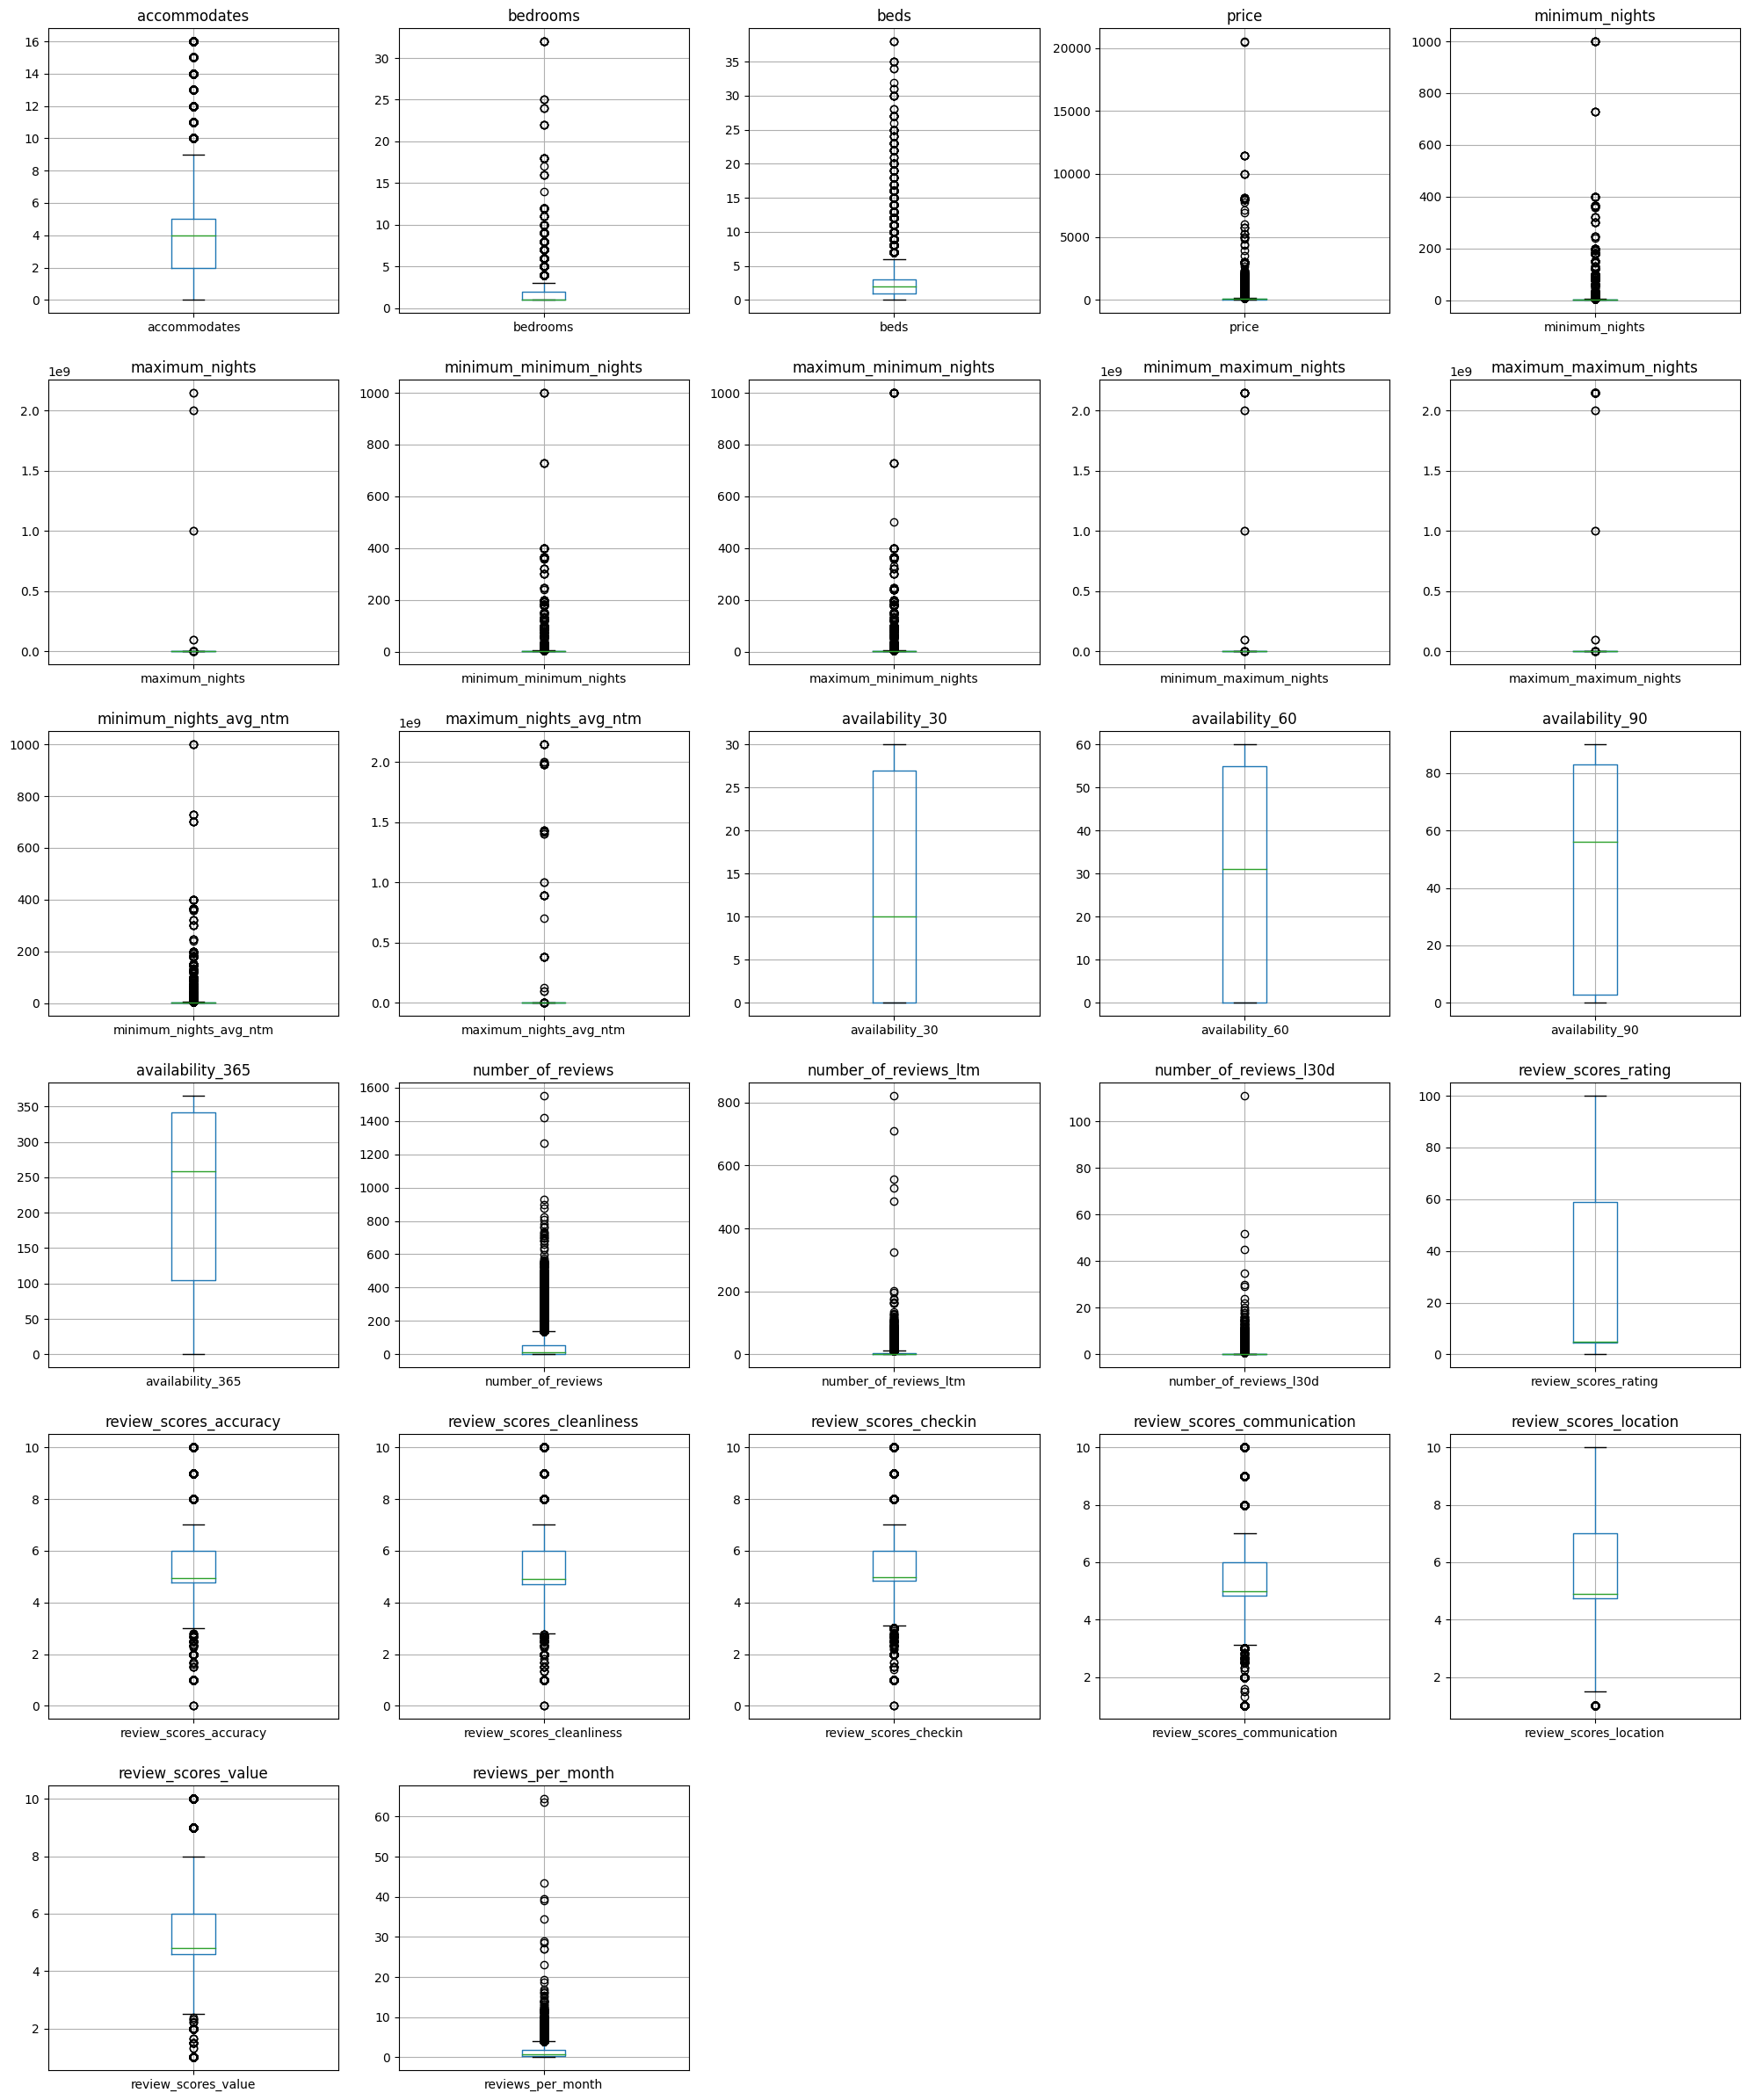

In [119]:
import numpy as np
import matplotlib.pyplot as plt

n_cols = 5
n_rows = int(np.ceil(30 / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(updated_df.columns[:30]):
    updated_df.boxplot(column=col, ax=axes[i])
    axes[i].set_title(col)

for i in range(27, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

In [120]:
columns_to_check = ['reviews_per_month', 'review_scores_location', 'number_of_reviews_l30d',
                    'number_of_reviews_ltm', 'number_of_reviews','price']

def remove_outliers(df, cols):
    for col in cols:
        if df[col].dtype in ['float64', 'int64']:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 3 * IQR
            upper_bound = Q3 + 3 * IQR
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

updated_df = remove_outliers(updated_df, columns_to_check)
updated_df

accommodates  bedrooms  beds  price  minimum_nights  maximum_nights  \
0                 4       1.0   1.0   40.0               3             365   
1                 3       1.0   1.0   50.0               2              14   
5                 3       1.0   NaN   50.0               5             365   
6                 6       1.0   3.0   40.0               1             730   
8                 2       1.0   1.0   50.0               1            1125   
...             ...       ...   ...    ...             ...             ...   
76612             2       1.0   1.0   28.0               1            1125   
76614             1       1.0   0.0   25.0               1            1125   
76622             2       1.0   1.0   42.0               1             365   
76681             5       2.0   3.0   64.0               1            1125   
76682             4       1.0   1.0   66.0               3            1125   

       minimum_minimum_nights  maximum_minimum_nights  minimum_maximum_nights  \
0                           3                       3                     365   
1                           2                       2                    1125   
5                           5                       5                     365   
6                           1                       1                     730   
8                           1                       1                    1125   
...                       ...                     ...                     ...   
76612                       1                       1                    1125   
76614                       1                       1                    1125   
76622                       1                       1                     365   
76681                       3                       3                      31   
76682                       3                       3                      31   

       maximum_maximum_nights  ...  neighbourhood_group_cleansed_Lisboa  \
0                         365  ...                                    1   
1                        1125  ...                                    1   
5                         365  ...                                    1   
6                         730  ...                                    1   
8                        1125  ...                                    1   
...                       ...  ...                                  ...   
76612                    1125  ...                                    1   
76614                    1125  ...                                    0   
76622                     365  ...                                    1   
76681                      31  ...                                    1   
76682                      31  ...                                    1   

       neighbourhood_group_cleansed_Loures  \
0                                        0   
1                                        0   
5                                        0   
6                                        0   
8                                        0   
...                                    ...   
76612                                    0   
76614                                    1   
76622                                    0   
76681                                    0   
76682                                    0   

       neighbourhood_group_cleansed_Lourinh  \
0                                         0   
1                                         0   
5                                         0   
6                                         0   
8                                         0   
...                                     ...   
76612                                     0   
76614                                     0   
76622                                     0   
76681                                     0   
76682                                     0   

       neighbourhood_group_cleansed_Mafra  \
0                                

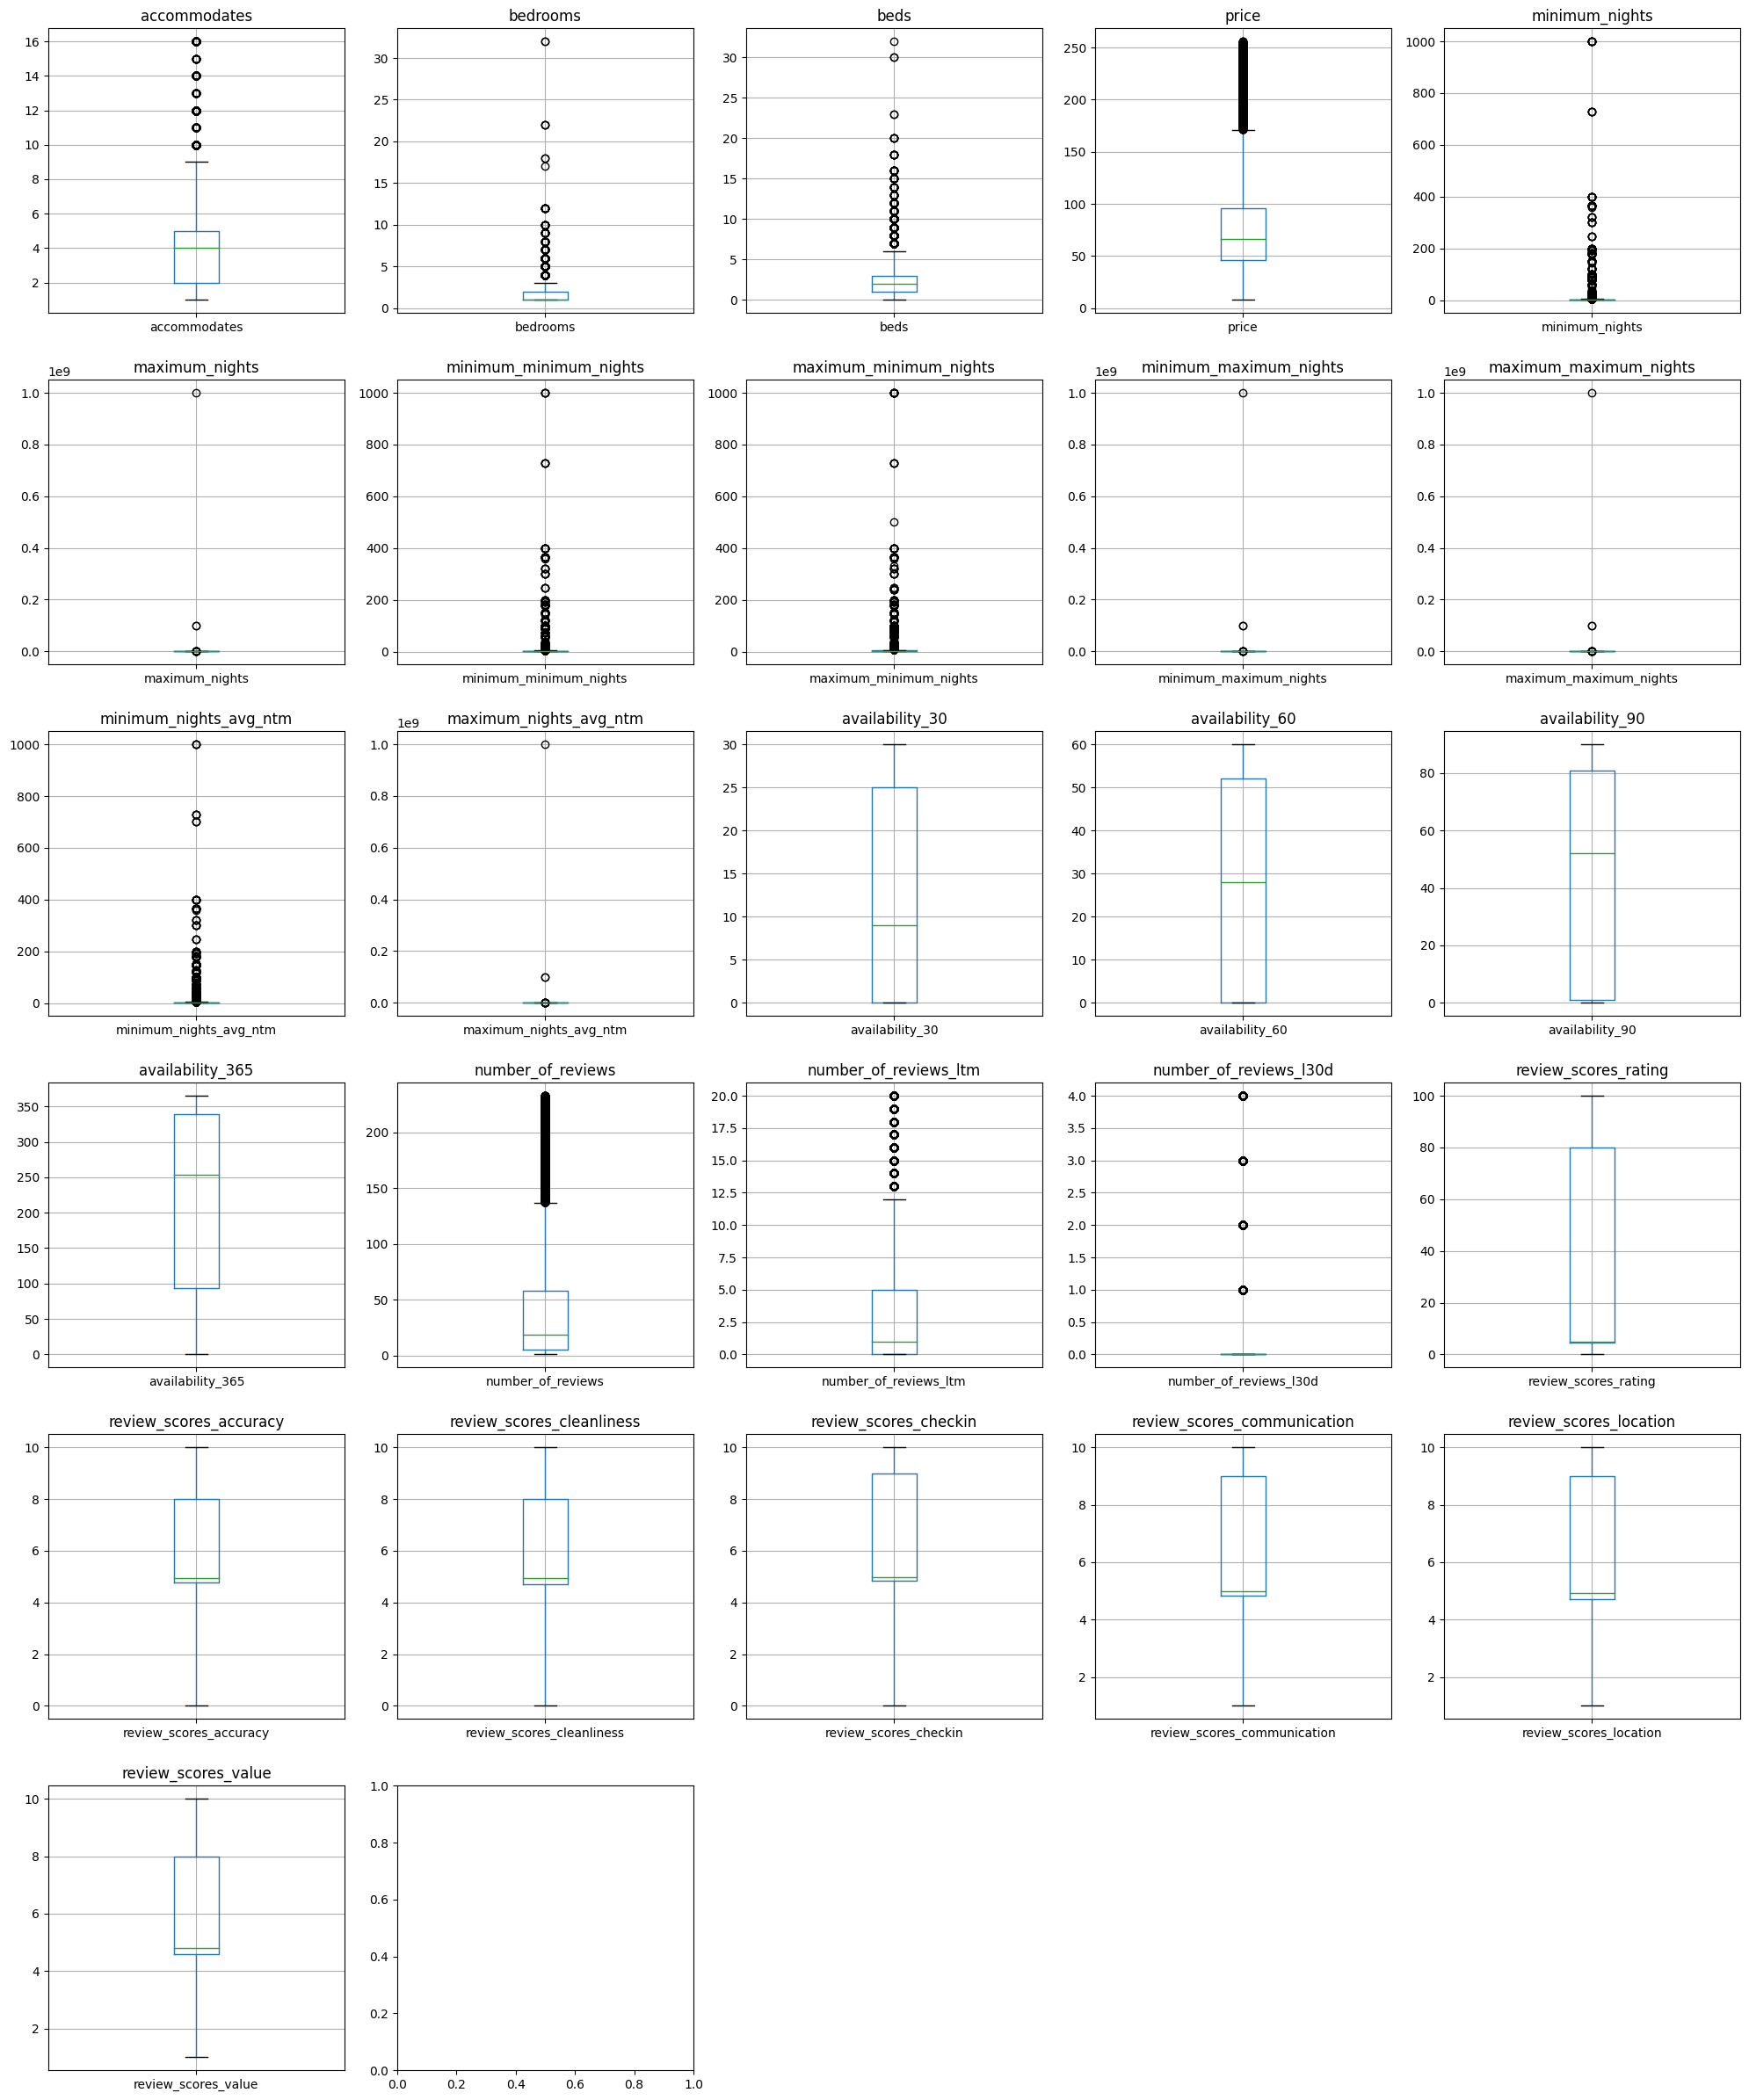

In [121]:
n_cols = 5
n_rows = int(np.ceil(26 / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(updated_df.columns[:26]):
    updated_df.boxplot(column=col, ax=axes[i])
    axes[i].set_title(col)

for i in range(27, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()


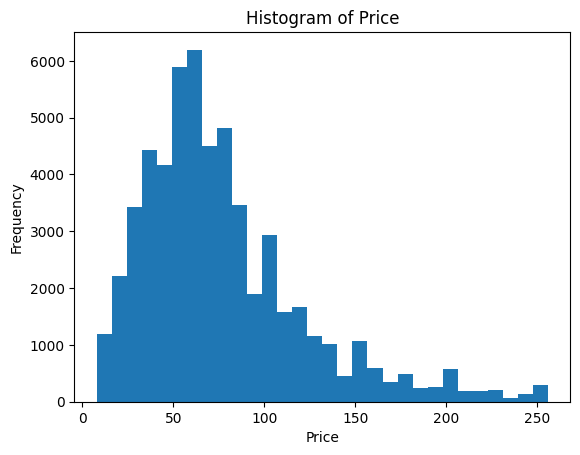

In [122]:
plt.hist(updated_df['price'], bins=30)
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### Imputation

In [123]:
updated_df.isna().sum().sum()

3472

In [124]:
updated_df.shape

(55681, 158)

In [125]:
df_outliers.isna().sum().sum()

108623

In [126]:
df_outliers.shape

(76716, 158)

In [127]:
from sklearn.impute import SimpleImputer

columns_to_impute = ['bedrooms', 'beds', 'review_scores_rating', 'review_scores_accuracy',
                     'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
                     'review_scores_location', 'review_scores_value', 'reviews_per_month', 'Value']

imputer_most_frequent = SimpleImputer(strategy='most_frequent')

for column in columns_to_impute[:2]:  # Apply 'most_frequent' to bedrooms and beds
    df_outliers[column] = imputer_most_frequent.fit_transform(df_outliers[[column]])

imputer_mean = SimpleImputer(strategy='mean')

for column in columns_to_impute[2:]:
    df_outliers[column] = imputer_mean.fit_transform(df_outliers[[column]])


In [128]:
df_outliers.isna().sum().sum()

0

In [129]:
columns_to_impute = ['bedrooms', 'beds', 'review_scores_accuracy', 'review_scores_cleanliness',
                     'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                     'review_scores_value', 'reviews_per_month', 'Value']

imputer_most_frequent = SimpleImputer(strategy='most_frequent')

for column in columns_to_impute:
    updated_df[column] = imputer_most_frequent.fit_transform(updated_df[[column]])

imputer_mean = SimpleImputer(strategy='mean')

for column in columns_to_impute[2:]:  # Skip bedrooms and beds
    updated_df[column] = imputer_mean.fit_transform(updated_df[[column]])


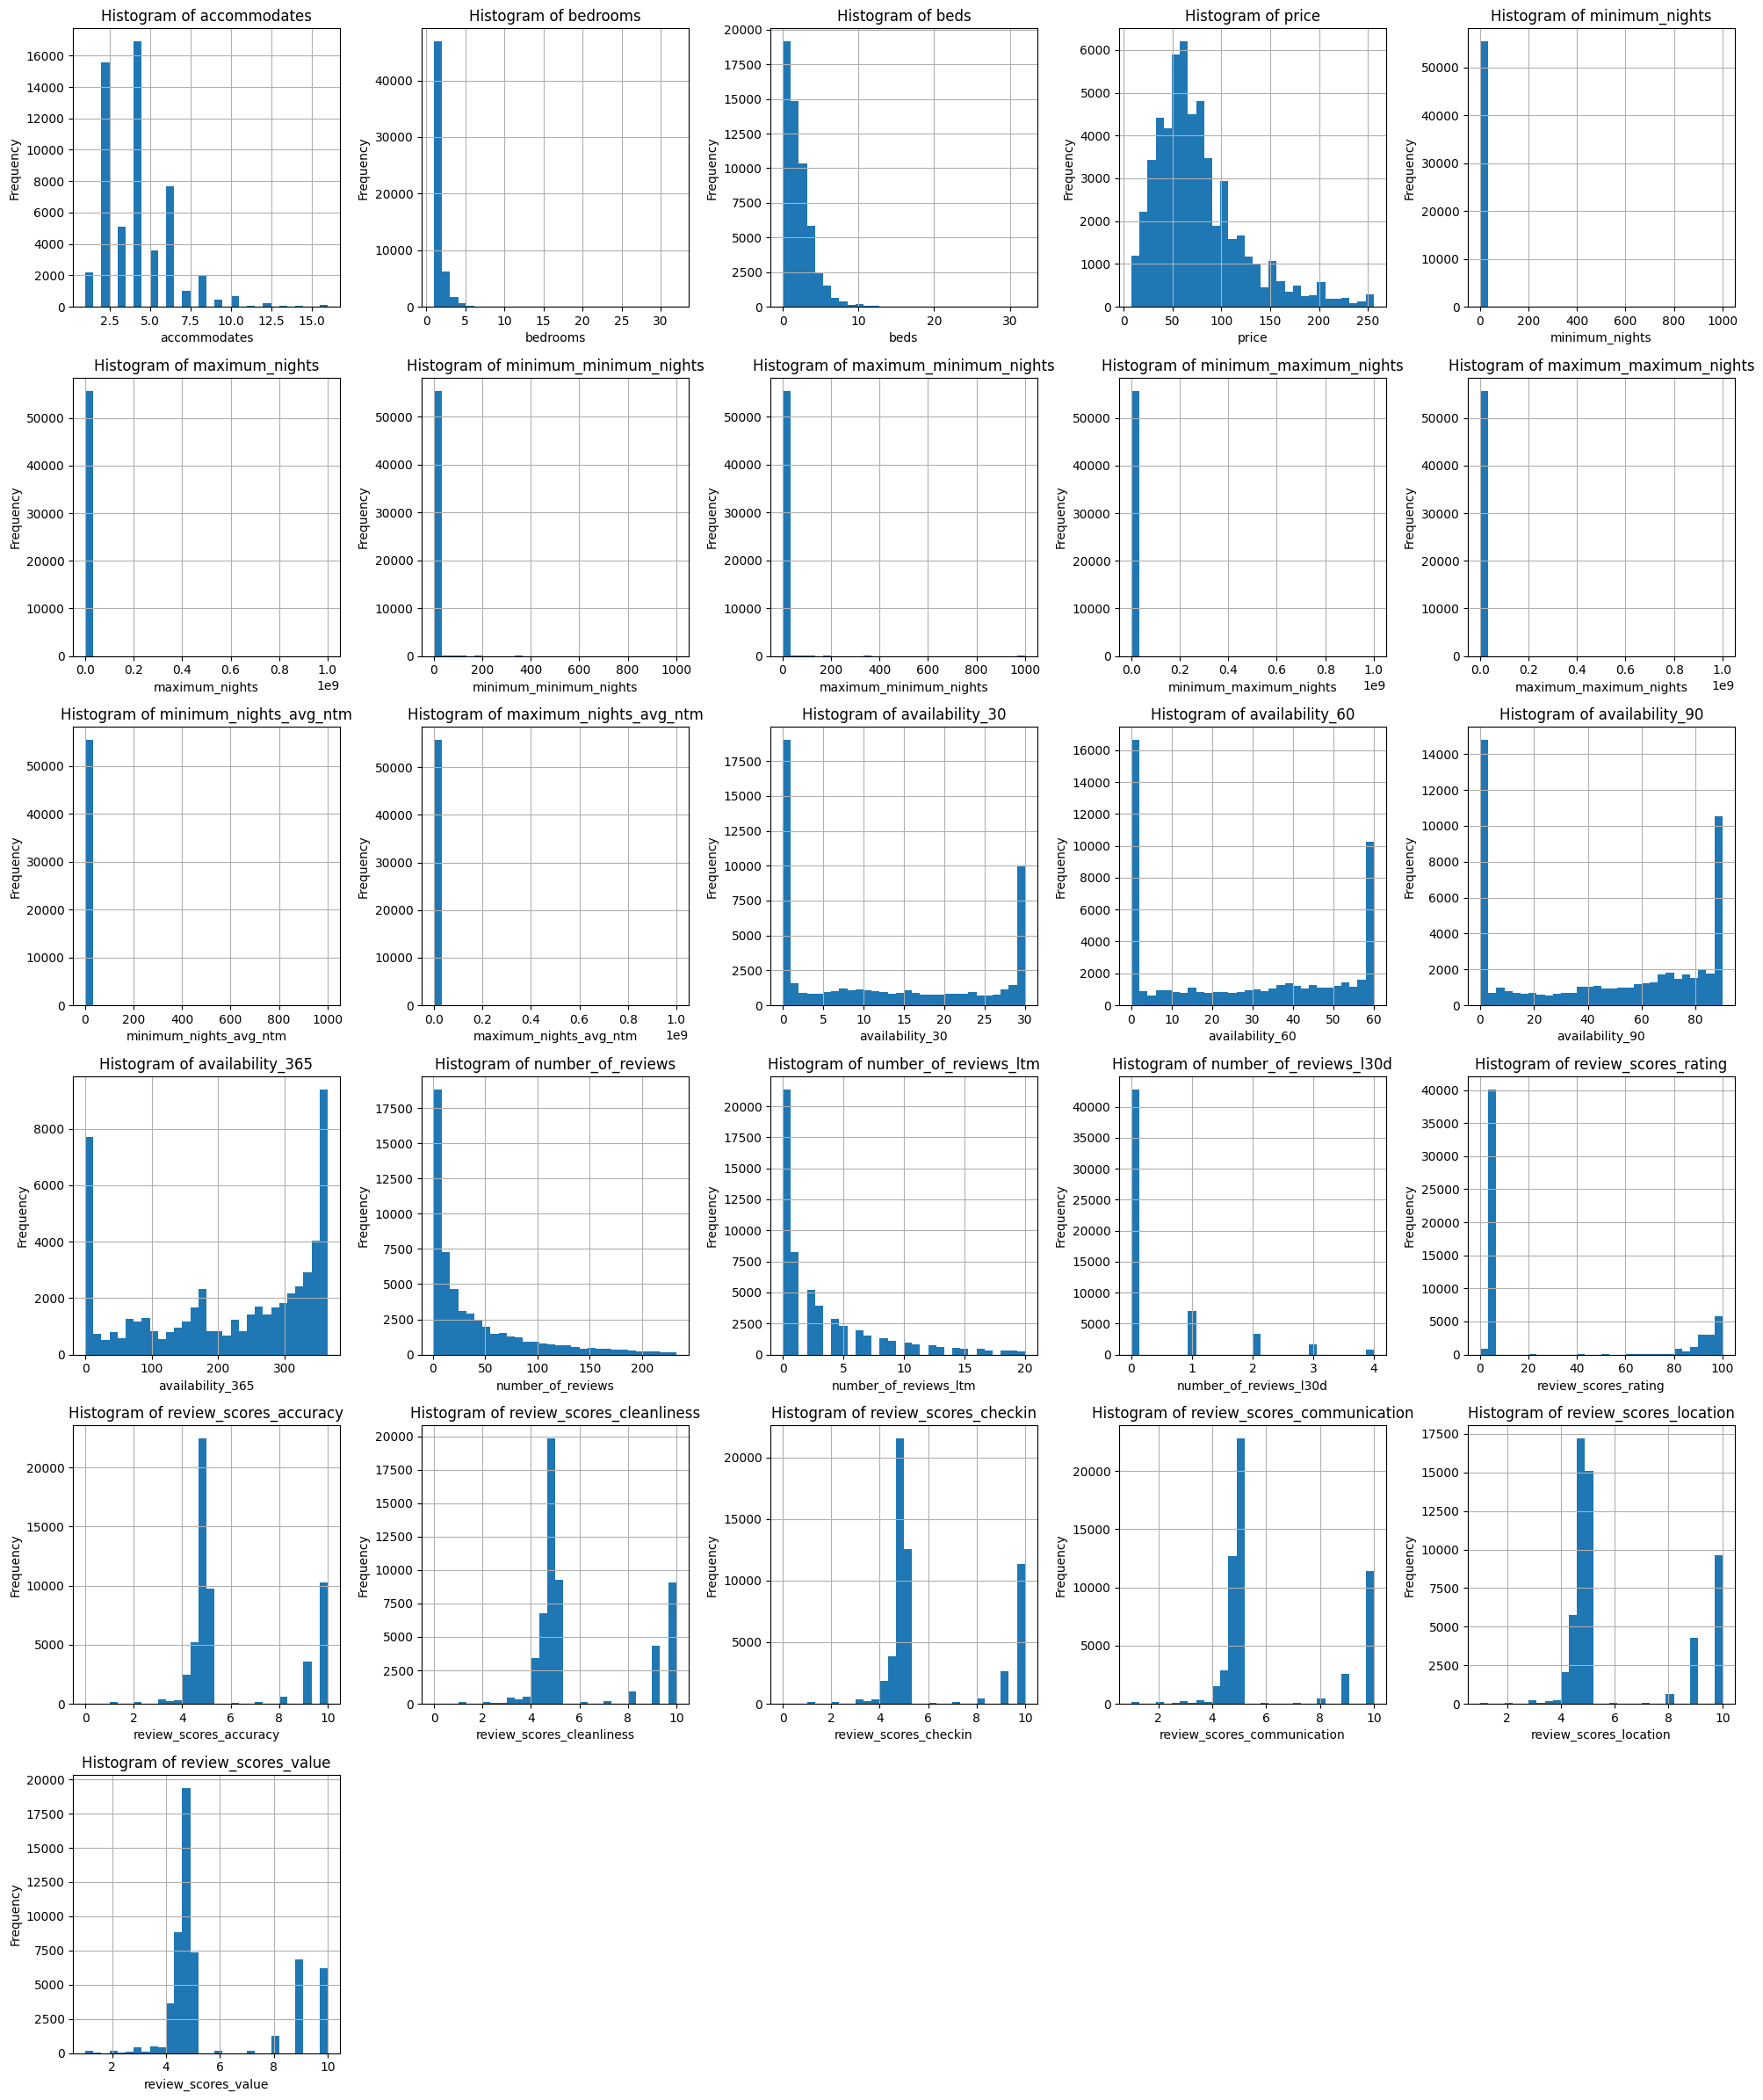

In [130]:
columns_per_row = 5

num_rows = (27 + columns_per_row - 1) // columns_per_row

plt.figure(figsize=(20, 4 * num_rows))

for i, column in enumerate(updated_df.columns[:26], 1):
    plt.subplot(num_rows, columns_per_row, i)
    updated_df[column].hist(bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Modeling

### H0 With clean data

In [174]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, ElasticNet
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.exceptions import ConvergenceWarning

In [154]:
X = updated_df.drop("price", axis=1)
Y = updated_df.price

In [155]:
x_train_h0, x_test_h0, y_train_h0, y_test_h0 = train_test_split(X, Y, test_size=0.2, random_state=8)

In [156]:
x_val_h0, x_test_h0, y_val_h0, y_test_h0 = train_test_split(x_test_h0, y_test_h0, test_size=0.2, random_state=8)


In [186]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def GetModelScores(estimator, X_train, X_test, y_train, y_test):
    scores_train = pd.DataFrame(columns=['MAE', 'MSE', 'RMSE', 'R2'])
    scores_test = pd.DataFrame(columns=['MAE', 'MSE', 'RMSE', 'R2'])

    model = estimator
    model.fit(X_train, y_train)

    prediction_train = model.predict(X_train)
    prediction_test = model.predict(X_test)

    scores_train.loc[0, 'MAE'] = mean_absolute_error(y_train, prediction_train)
    scores_train.loc[0, 'MSE'] = mean_squared_error(y_train, prediction_train)
    scores_train.loc[0, 'RMSE'] = np.sqrt(mean_squared_error(y_train, prediction_train))
    scores_train.loc[0, 'R2'] = r2_score(y_train, prediction_train)

    scores_test.loc[0, 'MAE'] = mean_absolute_error(y_test, prediction_test)
    scores_test.loc[0, 'MSE'] = mean_squared_error(y_test, prediction_test)
    scores_test.loc[0, 'RMSE'] = np.sqrt(mean_squared_error(y_test, prediction_test))
    scores_test.loc[0, 'R2'] = r2_score(y_test, prediction_test)

    feature_importance = None

    feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else np.arange(X_train.shape[1])

    if hasattr(model, 'coef_'):
        # Flatten the array if it's 2D and take the mean of the absolute values across rows (for multi-output models)
        coef = model.coef_
        if coef.ndim > 1:
            coef = np.mean(np.abs(coef), axis=0)
        feature_importance = pd.Series(coef, index=feature_names).sort_values(ascending=False).head(20)
    elif hasattr(model, 'feature_importances_'):
        # Ensure that the number of feature importances matches the number of columns or features
        if len(model.feature_importances_) == len(feature_names):
            feature_importance = pd.Series(model.feature_importances_, index=feature_names).sort_values(ascending=False).head(20)

    if feature_importance is not None:
      print("Top 10 Feature Importances:")
      print(feature_importance)
    else:
      print("No feature importances available for this model.")

    return scores_train, scores_test, feature_importance

In [187]:
models_and_params = {

    DecisionTreeRegressor: {
        'max_depth': [10, 20, 40, 80]
    },
    Ridge: {
        'alpha': [0.1, 1, 10]
    },
    XGBRegressor: {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.02, 0.2]
    },
    RandomForestRegressor: {
        "n_estimators": [50, 100]
    }
}

In [188]:
from scipy.linalg import LinAlgWarning

warnings.filterwarnings(action='ignore', category=LinAlgWarning)
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

all_results = []

for model_class, params in models_and_params.items():
    model_instance = model_class()

    if params:
        grid_search = GridSearchCV(model_instance, params, cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(x_train_h0, y_train_h0)
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        # Collect results
        results_df = pd.DataFrame(grid_search.cv_results_)
        results_df['model'] = model_class.__name__
        all_results.append(results_df)
    else:
        best_model = model_instance.fit(x_train_h0, y_train_h0)
        best_params = 'N/A'

    train_scores, test_scores, importance = GetModelScores(best_model, x_train_h0, x_val_h0, y_train_h0, y_val_h0)

    print("================================================================================")
    print("Used MODEL: ", model_class.__name__)
    print("Best Parameters: ", best_params)
    print("Train scores:")
    print(train_scores)
    print("Test scores:")
    print(test_scores)

all_results_df = pd.concat(all_results, ignore_index=True)

Top 10 Feature Importances:
bedrooms                                0.431389
accommodates                            0.203004
room_type_Entire home/apt               0.075318
reviews_per_month                       0.028338
review_scores_location                  0.025120
review_scores_rating                    0.024669
number_of_reviews                       0.022976
review_scores_value                     0.011868
neighbourhood_group_cleansed_Cascais    0.011767
room_type_Hotel room                    0.011235
property_type_Entire villa              0.010056
maximum_minimum_nights                  0.009500
availability_365                        0.009221
review_scores_cleanliness               0.009115
beds                                    0.008140
minimum_maximum_nights                  0.007976
number_of_reviews_ltm                   0.007837
minimum_nights                          0.006549
minimum_nights_avg_ntm                  0.006128
availability_30                         0

In [191]:
all_results_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.563142      0.014572         0.009242        0.001263   
1       1.620375      0.602548         0.015228        0.003076   
2       1.077258      0.005490         0.011864        0.000401   
3       1.210226      0.191255         0.014126        0.002693   
4       0.280643      0.029484         0.024259        0.005948   

  param_max_depth             params  split0_test_score  split1_test_score  \
0              10  {'max_depth': 10}       -1130.853140       -1099.472340   
1              20  {'max_depth': 20}       -1479.478072       -1401.760097   
2              40  {'max_depth': 40}       -1556.128858       -1471.872040   
3              80  {'max_depth': 80}       -1560.828039       -1465.510944   
4             NaN     {'alpha': 0.1}       -1121.600304       -1093.359869   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0       -1079.983716       -1034.934883       -1070.796748     -1083.208165   
1       -1422.520286       -1322.493622       -1331.137929     -1391.478001   
2       -1495.350275       -1450.143206       -1420.258089     -1478.750494   
3       -1483.823437       -1465.156695       -1424.416367     -1479.947097   
4       -1102.162857       -1044.882496       -1082.488365     -1088.898778   

   std_test_score  rank_test_score                  model param_alpha  \
0       31.715350                1  DecisionTreeRegressor         NaN   
1       58.673889                2  DecisionTreeRegressor         NaN   
2       45.934770                3  DecisionTreeRegressor         NaN   
3       44.872203                4  DecisionTreeRegressor         NaN   
4       25.470584                1                  Ridge         0.1   

  param_learning_rate param_n_estimators  
0                 NaN                NaN  
1                 NaN                NaN  
2                 NaN                NaN  
3                 NaN                NaN  
4                 NaN                NaN

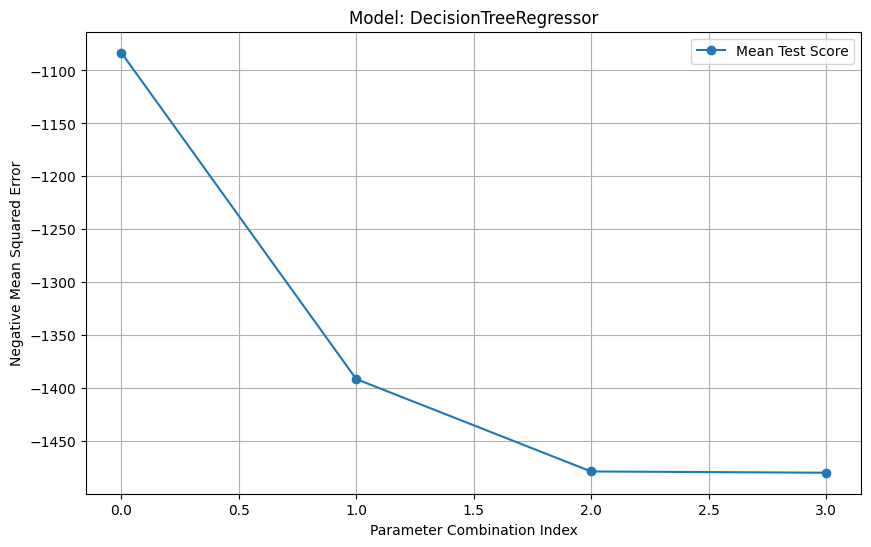

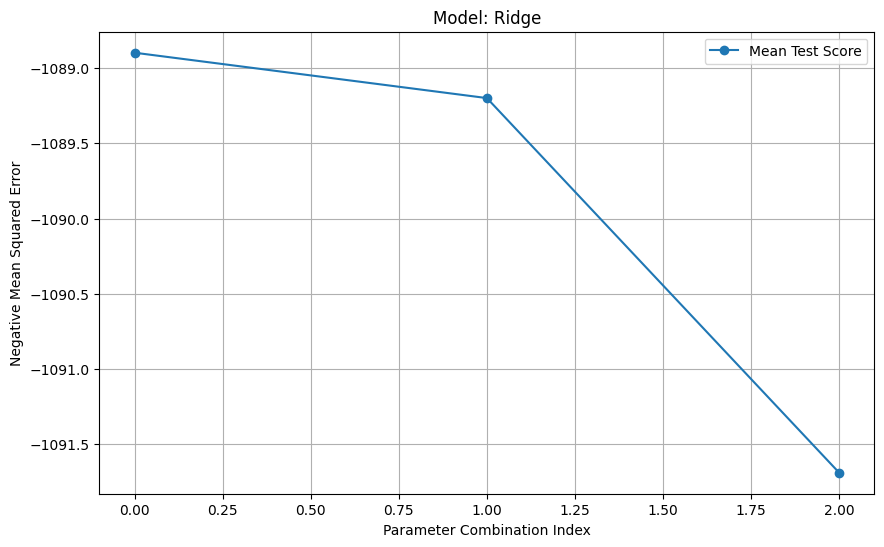

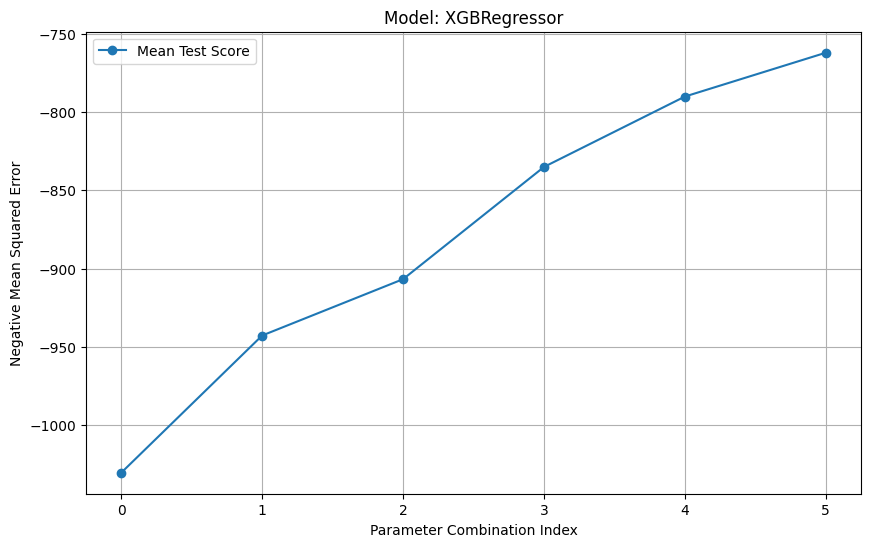

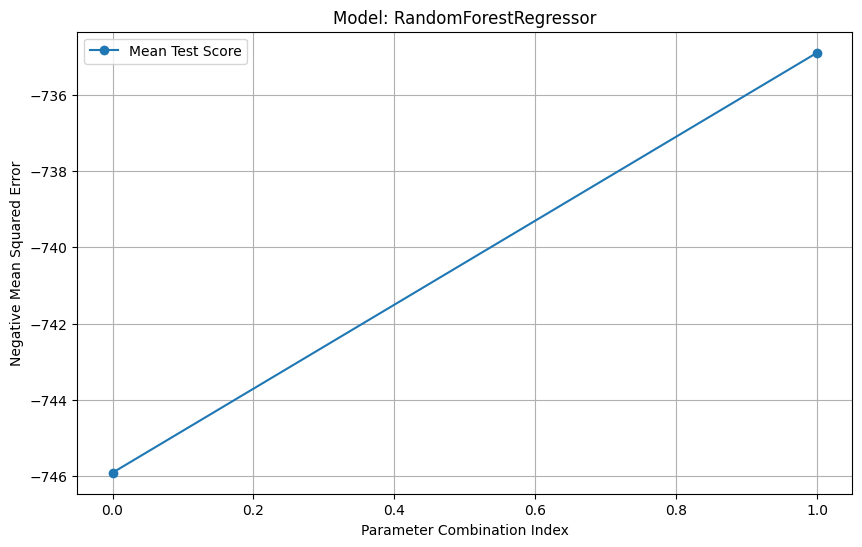

In [192]:
for model in all_results_df['model'].unique():
    model_results = all_results_df[all_results_df['model'] == model]
    plt.figure(figsize=(10, 6))
    plt.title(f"Model: {model}")
    # Assuming you want to plot mean test score for each parameter combination
    plt.plot(range(len(model_results)), model_results['mean_test_score'], marker='o', label='Mean Test Score')
    plt.xlabel('Parameter Combination Index')
    plt.ylabel('Negative Mean Squared Error')
    plt.legend()
    plt.grid(True)
    plt.show()

### H1: With top 20 columns

In [193]:
model_columns = {
    DecisionTreeRegressor: ["bedrooms","accommodates","reviews_per_month","number_of_reviews","room_type_Entire home/apt","review_scores_rating","availability_365","review_scores_location","review_scores_value","review_scores_cleanliness",
        "beds","number_of_reviews_ltm","review_scores_checkin","maximum_nights","review_scores_communication","review_scores_accuracy","maximum_minimum_nights","minimum_nights_avg_ntm","minimum_nights","availability_90"
    ],
    Ridge: [
        "property_type_Castle","property_type_Shared room in casa particular","property_type_Lighthouse","property_type_Shared room in hotel","property_type_Entire villa","property_type_Private room in resort","property_type_Entire bed and breakfast",
        "property_type_Earth house","property_type_Entire chalet","property_type_Room in nature lodge","property_type_Houseboat","property_type_Private room in loft","property_type_Shared room in chalet","property_type_Private room in tipi",
        "property_type_Shared room in camper/rv","property_type_Private room in boat","room_type_Hotel room","season_autumn","property_type_Room in boutique hotel","room_type_Entire home/apt"
    ],
    XGBRegressor: [
        "room_type_Entire home/apt","bedrooms","property_type_Room in boutique hotel","room_type_Private room","accommodates","room_type_Hotel room","room_type_Shared room","property_type_Private room in rental unit","property_type_Entire villa","property_type_Private room in apartment",
        "neighbourhood_group_cleansed_Cascais","neighbourhood_group_cleansed_Amadora","property_type_Room in hostel","review_scores_location","review_scores_rating","property_type_Entire apartment","property_type_Entire serviced apartment","maximum_minimum_nights","property_type_Entire chalet","beds"
    ],
    RandomForestRegressor: [
    "bedrooms", "accommodates", "reviews_per_month", "room_type_Entire home/apt", "number_of_reviews", "availability_365", "review_scores_rating", "review_scores_location", "review_scores_value", "review_scores_checkin", "review_scores_cleanliness", "number_of_reviews_ltm", "beds", "review_scores_accuracy",
    "review_scores_communication", "maximum_nights", "availability_90", "minimum_nights_avg_ntm", "availability_30", "maximum_minimum_nights"
]
}


In [194]:
for model_class in models_and_params.keys():
    model_instance = model_class()
    selected_columns = model_columns[model_class]
    x_train_selected = x_train_h0[selected_columns]
    x_val_selected = x_val_h0[selected_columns]

    params = models_and_params[model_class]
    if params:
        grid_search = GridSearchCV(model_instance, params, cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(x_train_selected, y_train_h0)
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
    else:
        best_model = model_instance.fit(x_train_selected, y_train_h0)
        best_params = 'N/A'

    train_scores, test_scores, importance = GetModelScores(best_model, x_train_selected, x_val_selected, y_train_h0, y_val_h0)

    print("================================================================================")
    print("Used MODEL: ", model_class)
    print("Best Parameters: ", best_params)
    print("Train scores:")
    print(train_scores)
    print("Test scores:")
    print(test_scores)

Top 10 Feature Importances:
bedrooms                       0.444906
accommodates                   0.210570
room_type_Entire home/apt      0.080588
reviews_per_month              0.041181
review_scores_rating           0.032053
review_scores_location         0.031439
number_of_reviews              0.019268
review_scores_value            0.018212
beds                           0.014213
maximum_minimum_nights         0.013033
review_scores_cleanliness      0.012865
availability_365               0.011897
availability_90                0.011754
maximum_nights                 0.011370
minimum_nights                 0.010521
number_of_reviews_ltm          0.009527
review_scores_checkin          0.008597
review_scores_accuracy         0.007970
minimum_nights_avg_ntm         0.005453
review_scores_communication    0.004585
dtype: float64
Used MODEL:  <class 'sklearn.tree._classes.DecisionTreeRegressor'>
Best Parameters:  {'max_depth': 10}
Train scores:
         MAE         MSE       RMSE     

### H2: With Outliers

In [195]:
X = df_outliers.drop("price", axis=1)
Y = df_outliers.price

In [196]:
x_train_out, x_test_out, y_train_out, y_test_out = train_test_split(X, Y, test_size=0.2, random_state=8)

In [197]:
x_val_out, x_test_out, y_val_out, y_test_out = train_test_split(x_test_out, y_test_out, test_size=0.2, random_state=8)


In [198]:
for model_class, params in models_and_params.items():
    model_instance = model_class()

    if params:
        grid_search = GridSearchCV(model_instance, params, cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(x_train_out, y_train_out)
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
    else:
        best_model = model_instance.fit(x_train_out, y_train_out)
        best_params = 'N/A'

    train_scores, test_scores, importance = GetModelScores(best_model, x_train_out, x_val_out, y_train_out, y_val_out)

    print("================================================================================")
    print("Used MODEL: ", model_class)
    print("Best Parameters: ", best_params)
    print("Train scores:")
    print(train_scores)
    print("Test scores:")
    print(test_scores)

Top 10 Feature Importances:
neighbourhood_group_cleansed_Mafra     0.255052
accommodates                           0.091357
maximum_minimum_nights                 0.065412
maximum_nights_avg_ntm                 0.065334
bedrooms                               0.065094
number_of_reviews                      0.062841
review_scores_location                 0.045266
minimum_nights_avg_ntm                 0.041628
maximum_nights                         0.036519
availability_30                        0.034853
reviews_per_month                      0.026259
availability_365                       0.025758
review_scores_accuracy                 0.022200
property_type_Private room in tipi     0.019135
review_scores_value                    0.018926
property_type_Private room in boat     0.016645
property_type_Entire villa             0.013394
neighbourhood_group_cleansed_Lisboa    0.011860
review_scores_communication            0.009947
beds                                   0.008178
dtype: float

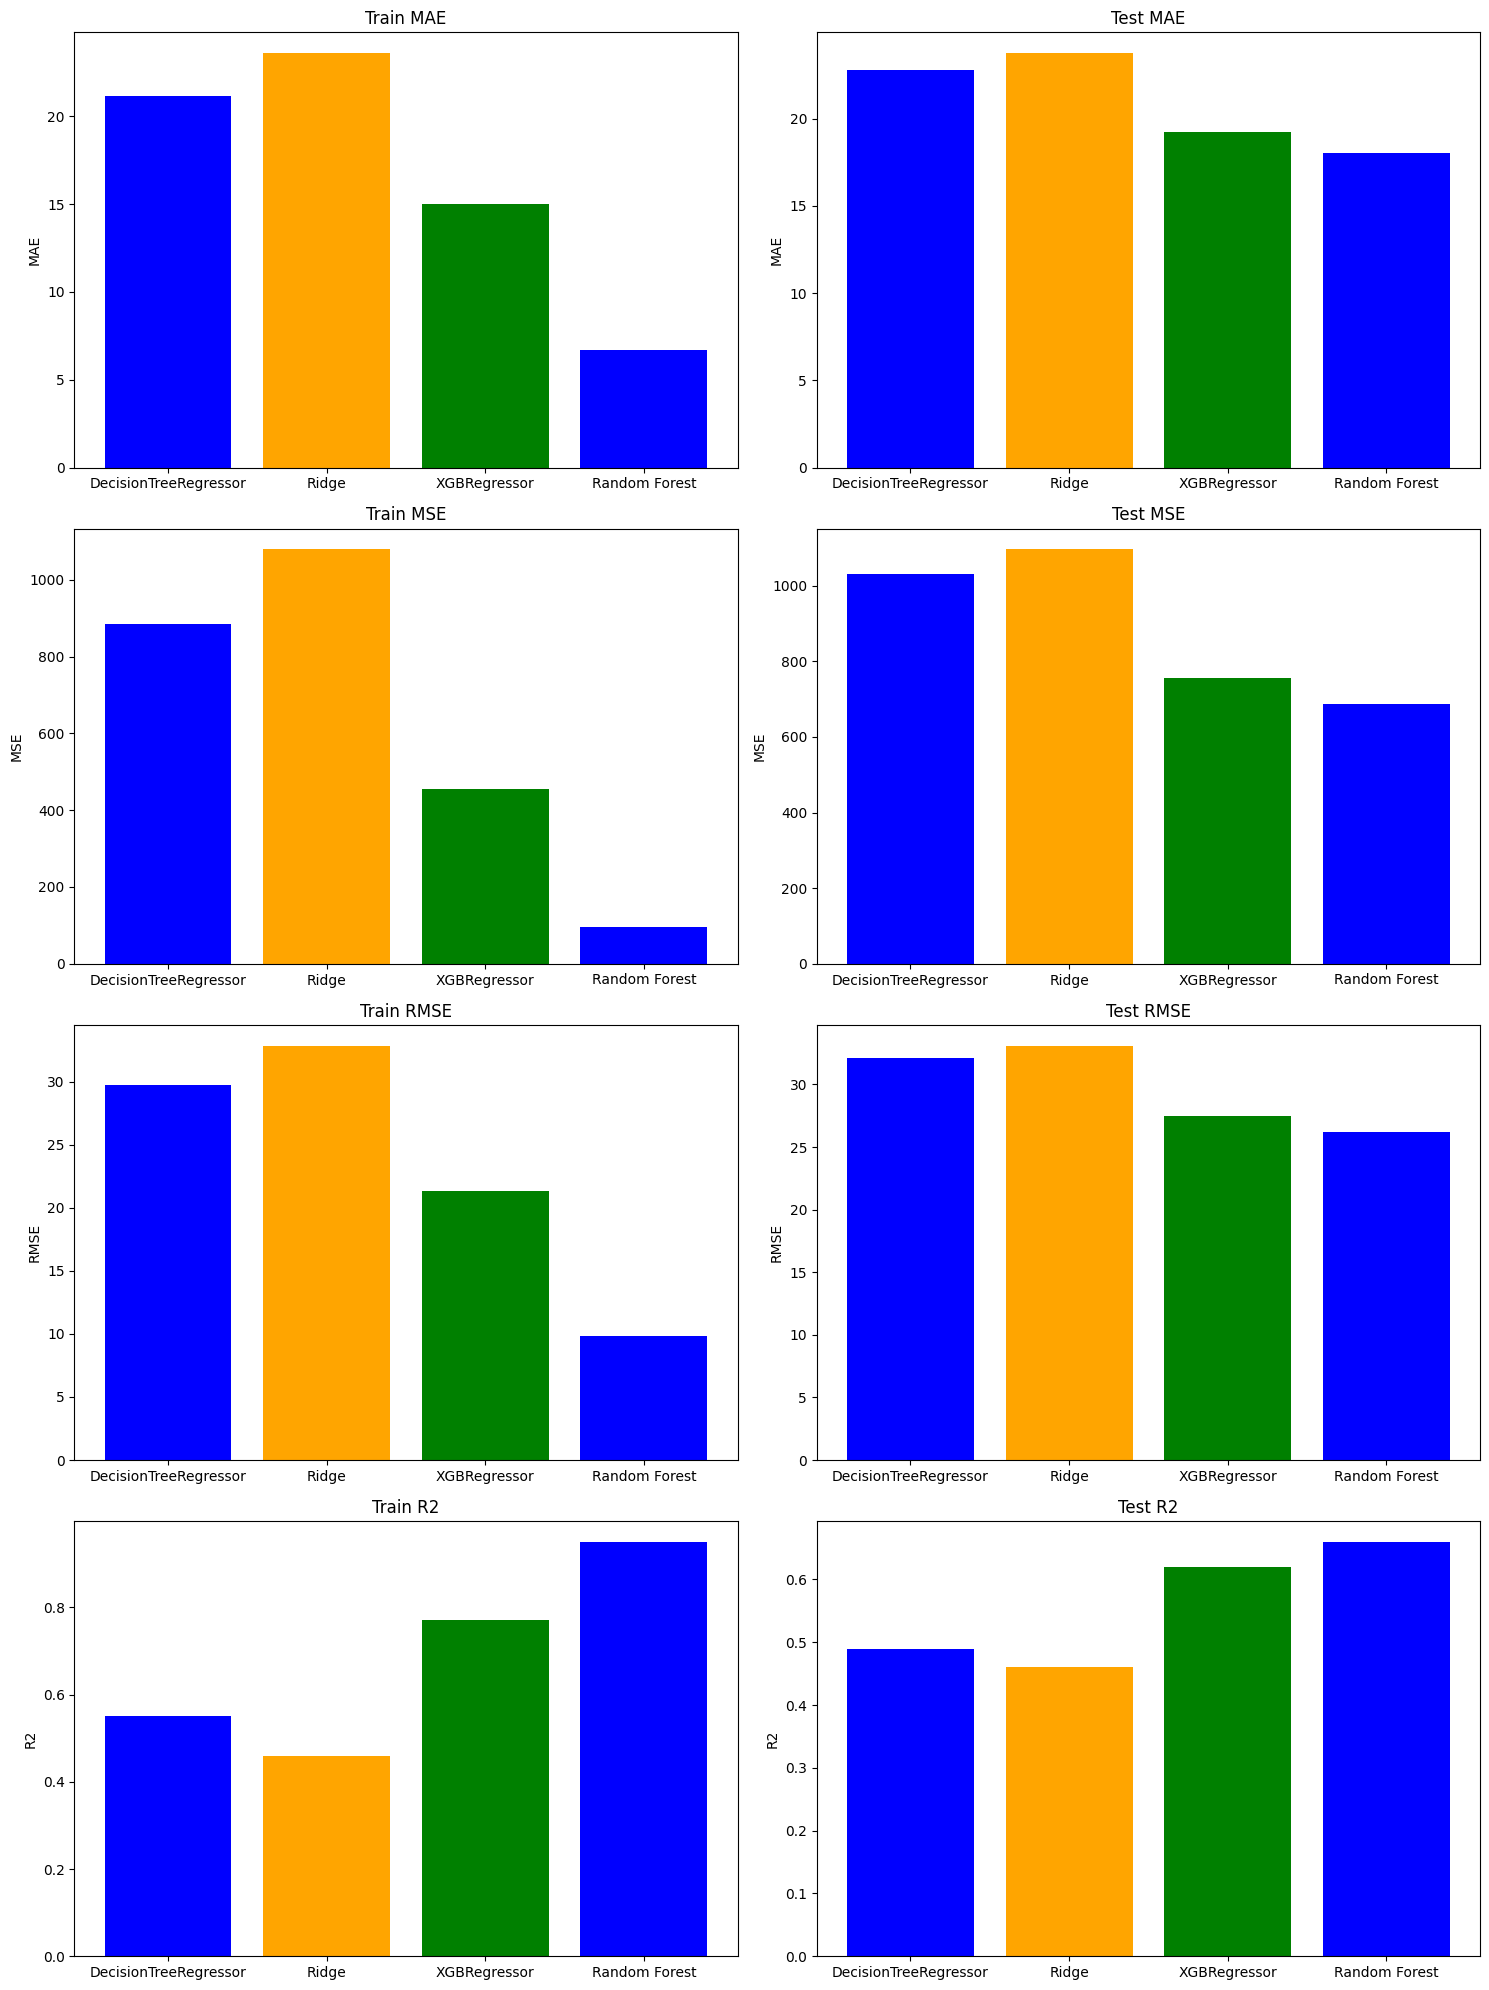

In [200]:
data = {
    'Model': ['DecisionTreeRegressor', 'Ridge', 'XGBRegressor', "Random Forest"],
    'Train MAE': [21.15, 23.61, 15.0, 6.72],
    'Test MAE': [22.79, 23.76, 19.22, 18.04],
    'Train MSE': [884.95, 1079.29, 454.88, 96.89],
    'Test MSE': [1032.16, 1096.46, 756.66, 686.32],
    'Train RMSE': [29.74, 32.85, 21.32, 9.84],
    'Test RMSE': [32.12, 33.11, 27.50, 26.19],
    'Train R2': [0.55, 0.46, 0.77, 0.95],
    'Test R2': [0.49, 0.46, 0.62, 0.66]
}

df = pd.DataFrame(data)


metrics = ['MAE', 'MSE', 'RMSE', 'R2']
fig, axs = plt.subplots(len(metrics), 2, figsize=(15, 20))


for i, metric in enumerate(metrics):
    axs[i, 0].bar(df['Model'], df[f'Train {metric}'], color=['blue', 'orange', 'green'])
    axs[i, 0].set_title(f'Train {metric}')
    axs[i, 0].set_ylabel(metric)
    axs[i, 1].bar(df['Model'], df[f'Test {metric}'], color=['blue', 'orange', 'green'])
    axs[i, 1].set_title(f'Test {metric}')
    axs[i, 1].set_ylabel(metric)


plt.tight_layout()
plt.show()

## Evaluation

In [199]:
def GetScoresOnly(model, X_train, y_train, X_val=None, y_val=None, X_test=None, y_test=None):
    scores_train = pd.DataFrame(columns=['MAE', 'MSE', 'RMSE', 'R2'])
    scores_val = pd.DataFrame(columns=['MAE', 'MSE', 'RMSE', 'R2'])
    scores_test = pd.DataFrame(columns=['MAE', 'MSE', 'RMSE', 'R2'])

    prediction_train = model.predict(X_train)
    scores_train.loc[0, 'MAE'] = mean_absolute_error(y_train, prediction_train)
    scores_train.loc[0, 'MSE'] = mean_squared_error(y_train, prediction_train)
    scores_train.loc[0, 'RMSE'] = np.sqrt(mean_squared_error(y_train, prediction_train))
    scores_train.loc[0, 'R2'] = r2_score(y_train, prediction_train)

    if X_val is not None and y_val is not None:
        prediction_val = model.predict(X_val)
        scores_val.loc[0, 'MAE'] = mean_absolute_error(y_val, prediction_val)
        scores_val.loc[0, 'MSE'] = mean_squared_error(y_val, prediction_val)
        scores_val.loc[0, 'RMSE'] = np.sqrt(mean_squared_error(y_val, prediction_val))
        scores_val.loc[0, 'R2'] = r2_score(y_val, prediction_val)

    if X_test is not None and y_test is not None:
        prediction_test = model.predict(X_test)
        scores_test.loc[0, 'MAE'] = mean_absolute_error(y_test, prediction_test)
        scores_test.loc[0, 'MSE'] = mean_squared_error(y_test, prediction_test)
        scores_test.loc[0, 'RMSE'] = np.sqrt(mean_squared_error(y_test, prediction_test))
        scores_test.loc[0, 'R2'] = r2_score(y_test, prediction_test)

    print("Scores for the training set are:\n")
    print(scores_train)

    if X_val is not None and y_val is not None:
        print("Scores for the validation set are:\n")
        print(scores_val)

    if X_test is not None and y_test is not None:
        print("Scores for the testing set are:\n")
        print(scores_test)

In [201]:
param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.02, 0.2]
    }

estimator = XGBRegressor()
grid_search = GridSearchCV(estimator, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train_h0, y_train_h0)
best_params = grid_search.best_params_
best_params

{'learning_rate': 0.2, 'n_estimators': 300}

In [202]:
GetScoresOnly(grid_search, x_train_h0, y_train_h0, x_val_h0, y_val_h0, x_test_h0, y_test_h0)

Scores for the training set are:

         MAE         MSE       RMSE        R2
0  15.016258  454.883483  21.327998  0.773491
Scores for the validation set are:

         MAE         MSE       RMSE        R2
0  19.222959  756.661223  27.507476  0.628519
Scores for the testing set are:

         MAE         MSE       RMSE        R2
0  19.261497  757.408236  27.521051  0.645022


In [203]:
x_train_h0.shape, x_val_h0.shape, x_train_h0.shape[0] + x_val_h0.shape[0]

((44544, 157), (8909, 157), 53453)

In [204]:
combined_X_train_h0 = pd.concat([x_train_h0, x_val_h0], axis=0)
combined_y_train_h0 = pd.concat([y_train_h0, y_val_h0], axis=0)

# Reset the index of the combined DataFrame
combined_X_train_h0.reset_index(drop=True, inplace=True)
combined_y_train_h0.reset_index(drop=True, inplace=True)

print(combined_X_train_h0.shape, combined_y_train_h0.shape)

(53453, 157) (53453,)


In [205]:
param_grid = {
        'n_estimators': [500, 600],
        'learning_rate': [0.02, 0.2, 1]
    }

combined_estimator = XGBRegressor()
grid_search_combined = GridSearchCV(combined_estimator, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_combined.fit(combined_X_train_h0, combined_y_train_h0)
best_params = grid_search_combined.best_params_
best_params

{'learning_rate': 0.2, 'n_estimators': 600}

In [206]:
GetScoresOnly(grid_search_combined, combined_X_train_h0, combined_y_train_h0, x_test_h0, y_test_h0)

Scores for the training set are:

         MAE         MSE       RMSE        R2
0  12.159527  306.218439  17.499098  0.847884
Scores for the validation set are:

         MAE         MSE       RMSE        R2
0  17.873053  661.863806  25.726714  0.689801
